In [1]:
from transformers import GPT2LMHeadModel

c:\Users\Deevia\miniconda3\envs\gpt\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [94]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")
model_hf

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [96]:
sd_hf = model_hf.state_dict()

for k , v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [ ]:
# tokens vocab size: 
# embd_dim: 768
# max_seqlen: 1024


# transformer.wte.weight torch.Size([50257, 768])
# transformer.wpe.weight torch.Size([1024, 768])


# embedding metrix: -> (vocan_size, embd_dim) -> (50257, 768)
# postional encoding: -> (max_seq_len, embd_dim) -> (1024, 768)

In [11]:
# postional encoding layer weights:
# first 20 weiht values for postion encoding wt metrix:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

Text(0.5, 1.0, 'Postional encoding ')

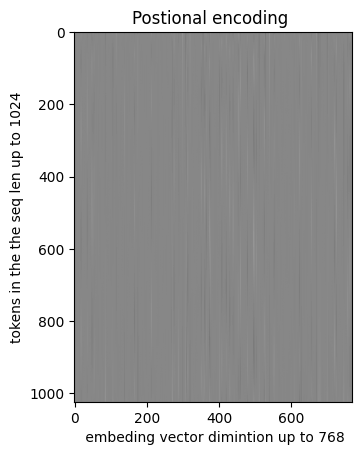

In [18]:
import matplotlib.pyplot as plt
plt.imshow(sd_hf["transformer.wpe.weight"],  cmap="gray")
plt.ylabel("tokens in the the seq len up to 1024")
plt.xlabel(" embeding vector dimintion up to 768")
plt.title("Postional encoding ")


# each row in the below table is a postion in the seq len and has its unique representataion

# this fixed info wrt to each position helps the model to understand the postion of the token in the
# sentence


In [27]:
sd_hf["transformer.wpe.weight"].shape  # seq_len, embd_dim, 
sd_hf["transformer.wpe.weight"][150, :].shape

torch.Size([768])

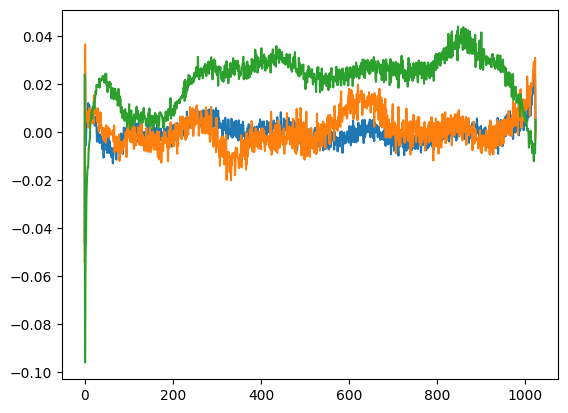

In [19]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 200])
plt.plot(sd_hf["transformer.wpe.weight"][:, 250])

In [ ]:
# in the attention all i need the 
# the postional encodings were fixed and were a sinosuidal in nature
#in GPT2 the postional encodinggs are not fixed the intialized randomly and 
# starts learning in the processes of training 
# from the above fig u can see that that the graph is for all the 1024 postions fopr any perticular embddim pointlike 150 200
# intial the graph is noisy having no smoothness 
# after training it gets smootth

#

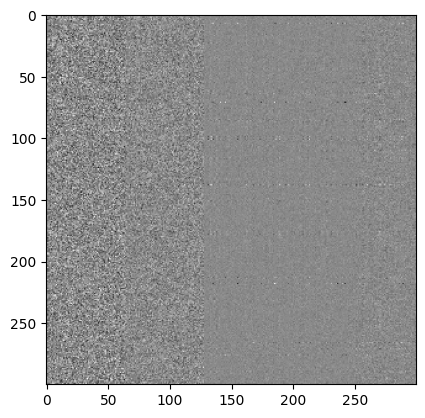

In [28]:
# below metrix 1st layer one of its weight in block of 300*300
# it jhas some intersesting struccture


plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:300,:300], cmap="gray")

In [29]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend"},
 {'generated_text': "Hello, I'm a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string"},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example."}]

In [ ]:
# GPT 2 papaer:
# under model :
# they added add&norm layer before the attention or MLP (oppositie to 2016 papaer)
# addtional add&norm added right before classifier


# in the below fig for gpt 2 changes need to be done mention above
#   1. add&norm layer is before attention block and MLP(feed forward Layer) in the block Nx 
#  2. in the last before linear layer one add&norm layer will get added



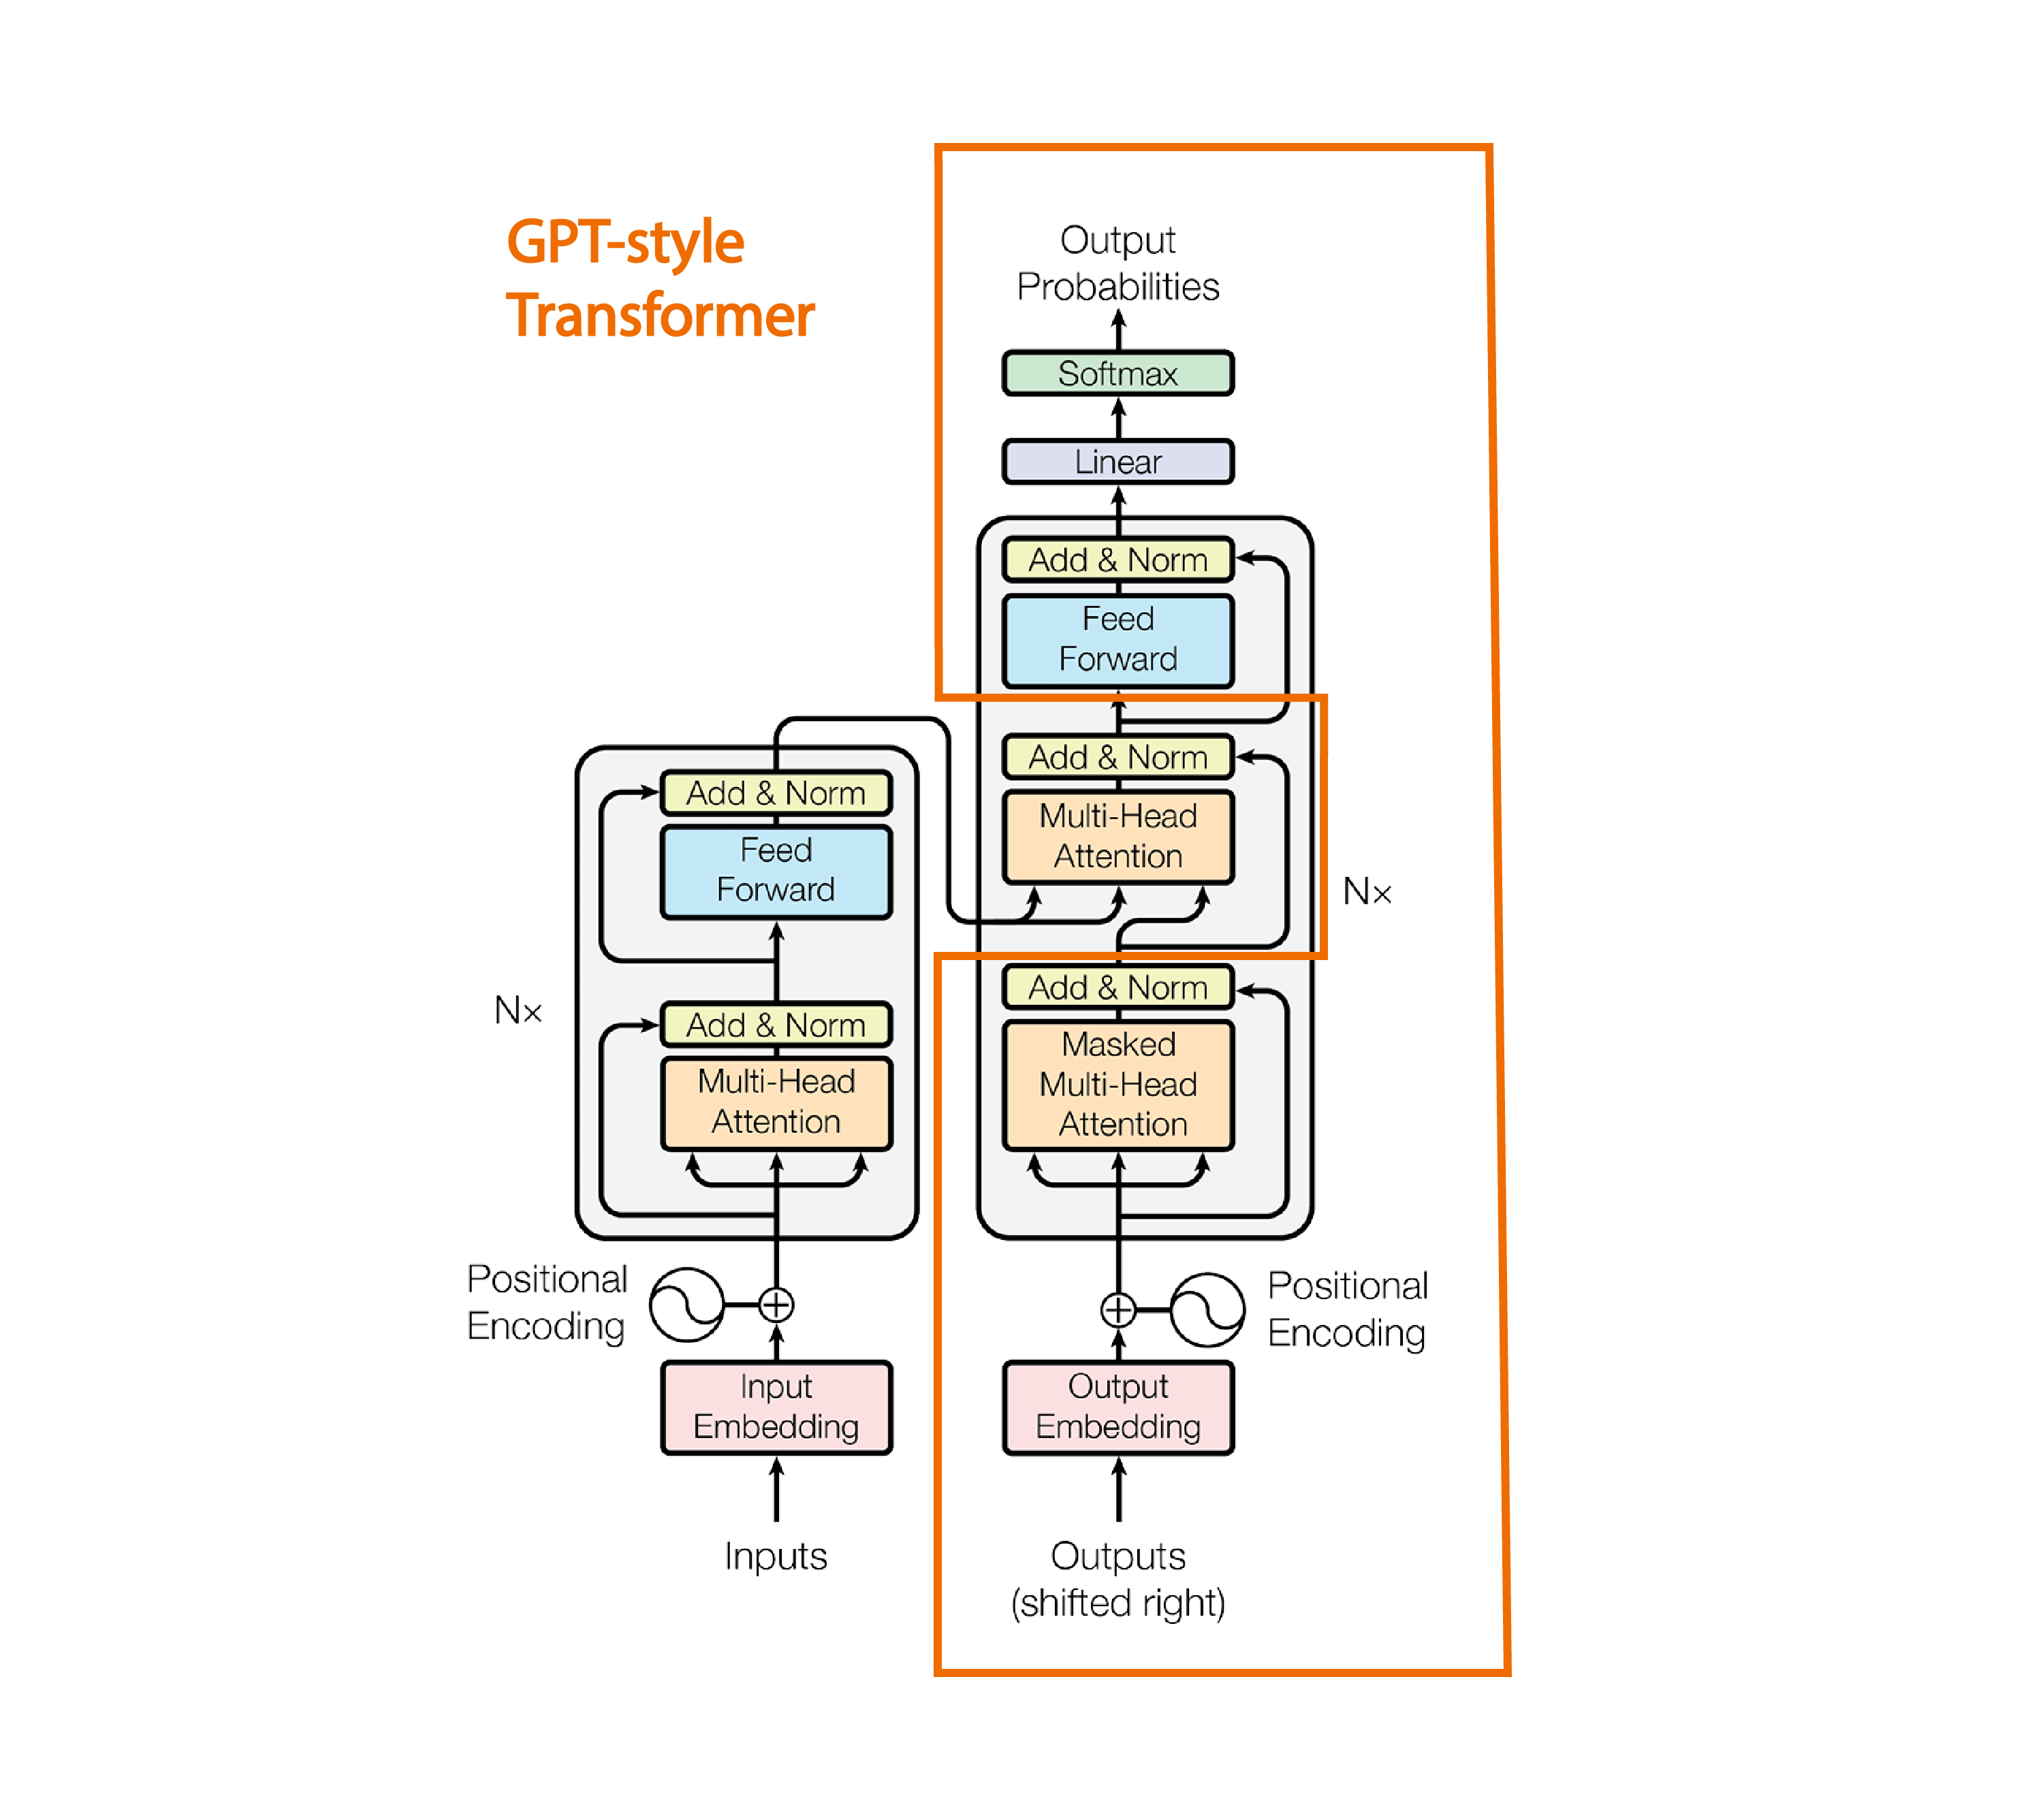

In [30]:
# GPT model layer name and variable names 

sd_hf = model_hf.state_dict()
for k , v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [ ]:
#GPT class construction:
# in the below class the variables and objects will be similar to the huggingface
# variable and objects shown above

# below from fig 
# wte - embeding layer
# wpe - postional encoding layer
# h- head shownin Block Nx in fig 
# ln_f - Layer norn to be added before Linear layer
# lm_head- final Linear layer before soft max
 

@dataclass
class GPTConfig:
    block_size: int = 1024 # max sequence length
    vocab_size: int = 50257 # number of tokens: 50,000 BPE merges + 256 bytes tokens + 1 <|endoftext|> token
    n_layer: int = 12 # number of layers
    n_head: int = 12 # number of heads
    n_embd: int = 768 # embedding dimension




class GPT(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.config = config


        self.transformer = nn.ModuleDict(dict(
            wte = nn.Embedding(config.vocab_size, config.n_embd),
            wpe = nn.Embedding(config.block_size, config.n_embd),
            h = nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f = nn.LayerNorm(config.n_embd),
        ))
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)


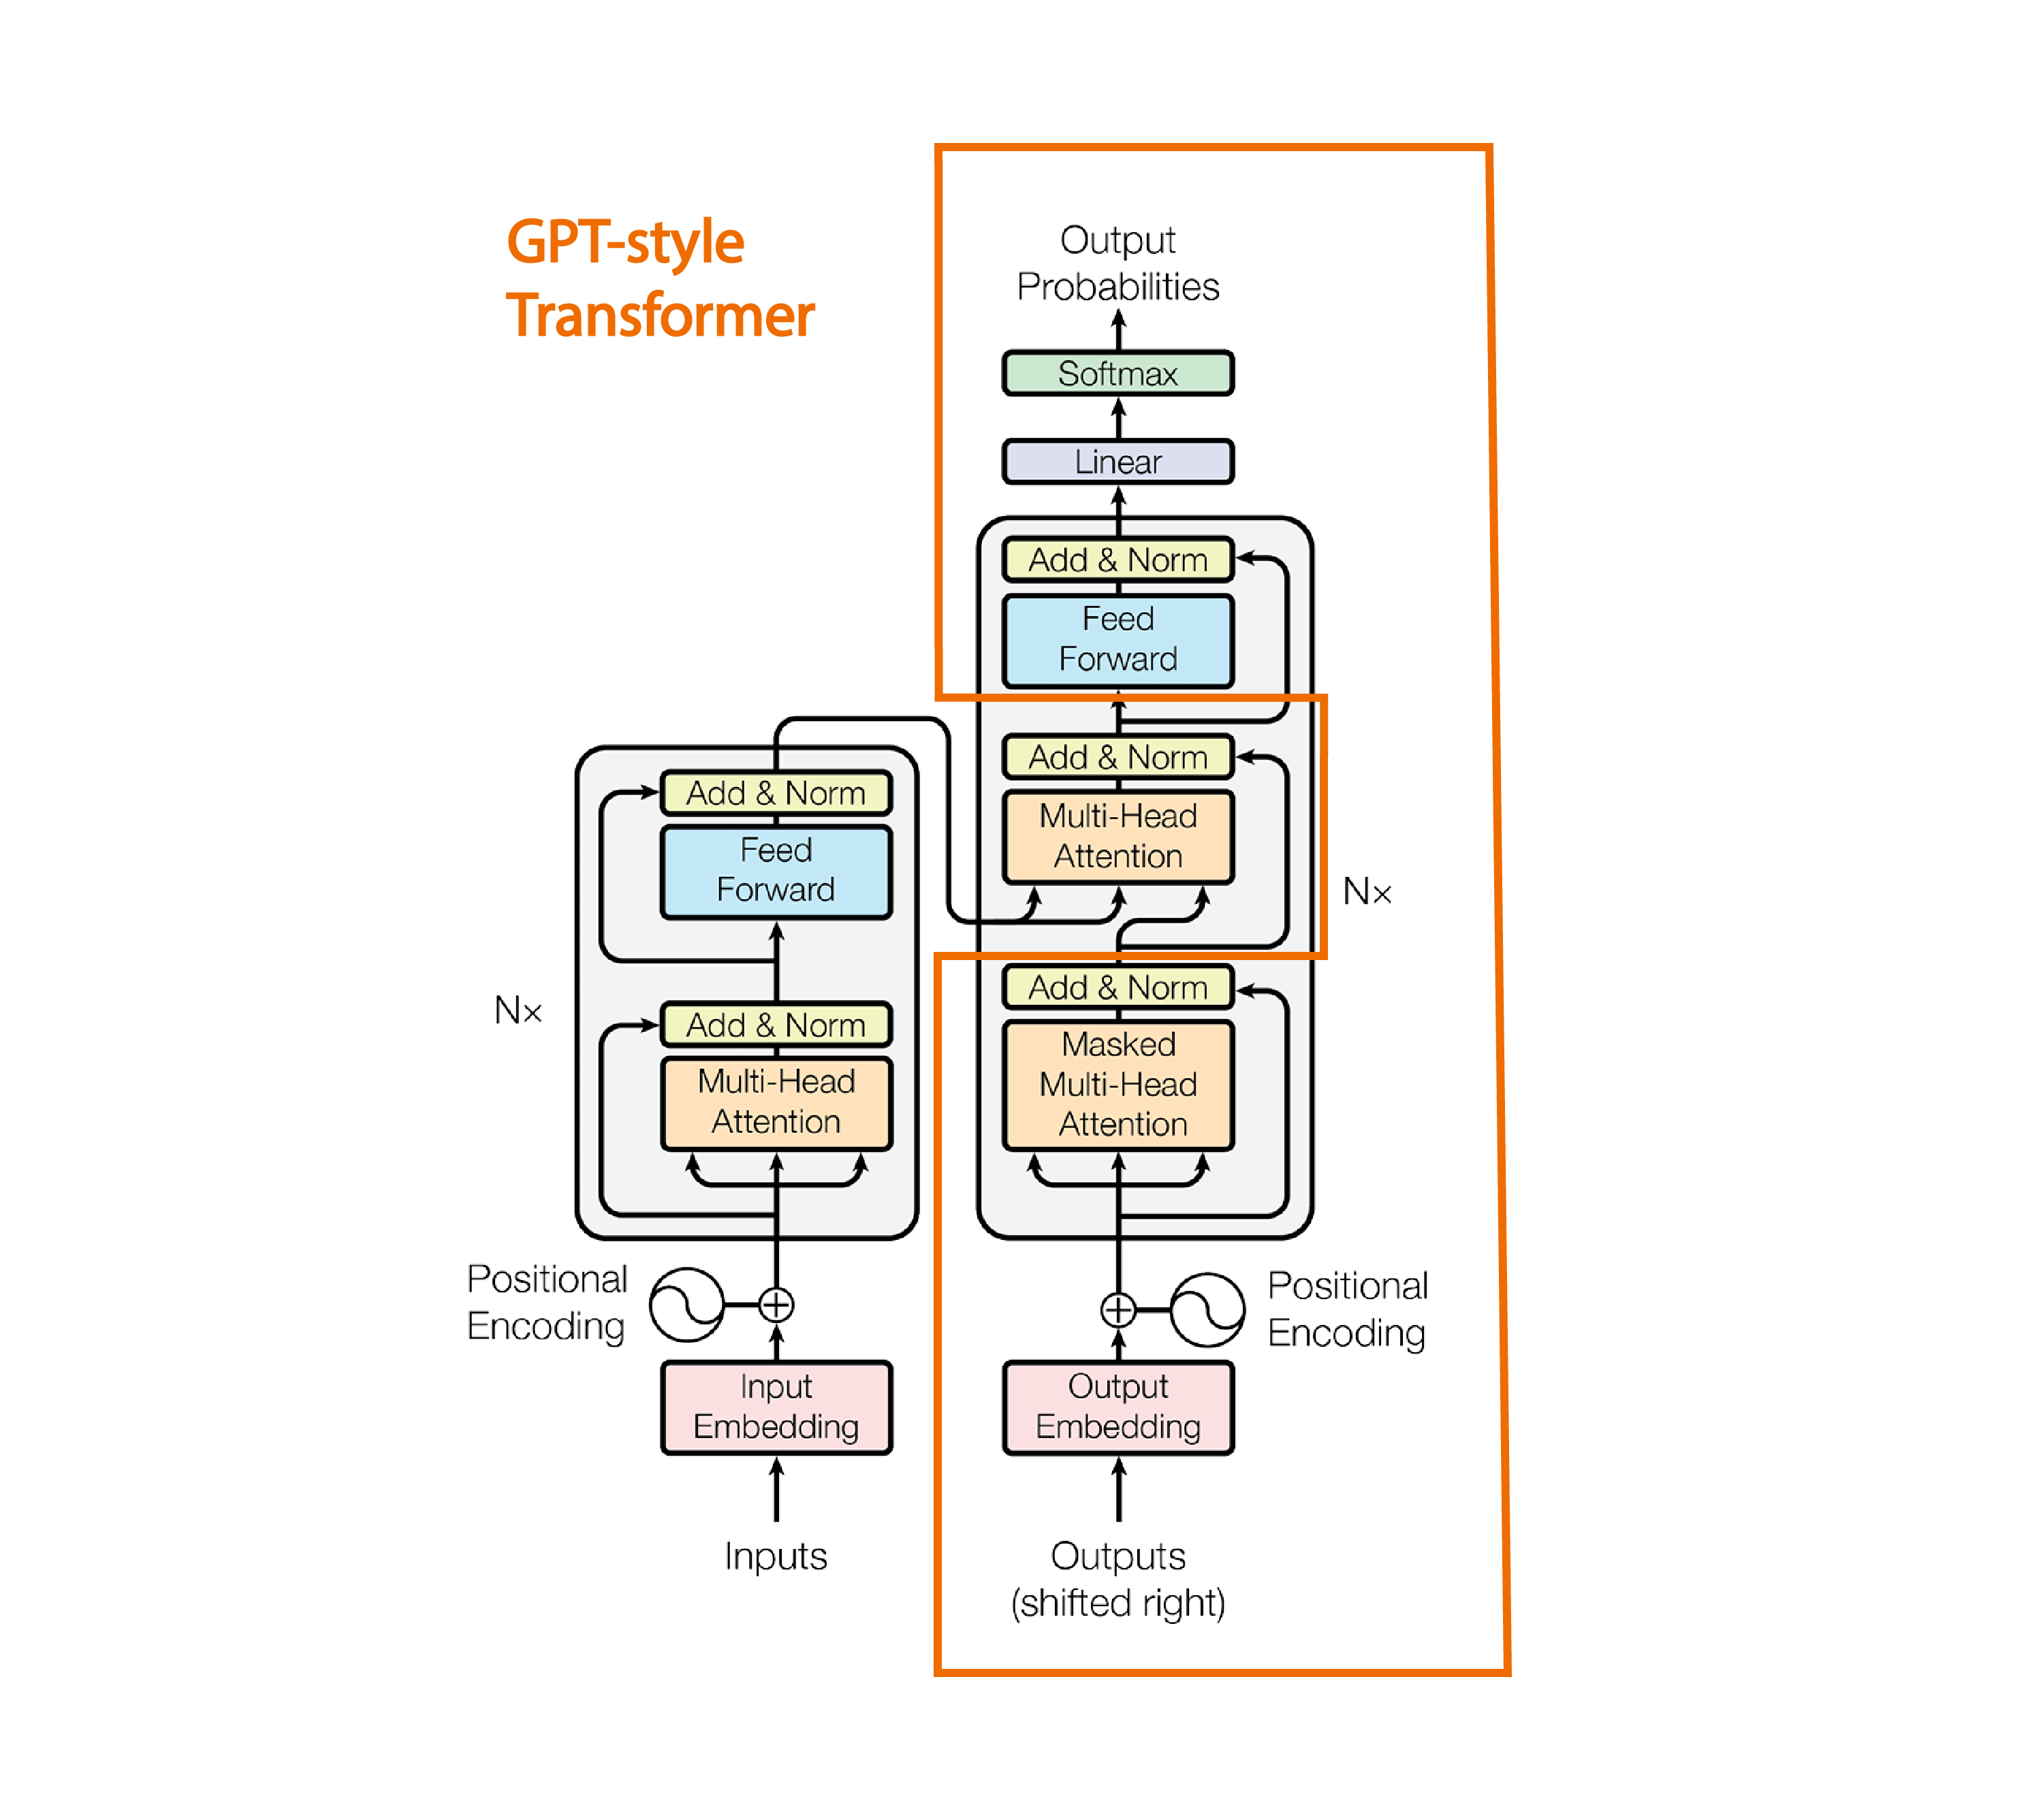

In [ ]:
# version 2:
# changes in the block 
# in GPT2 the Block has some changes as compare to 2016 transformer


# here in forward insdie bolock
# x -> nrom(x) -> atention -> + x -> final x

# reason clean residual path helps in better optimisation
# where as in the transforemer 
# x -> attention ->  + norm(x) -> final x

# in attentiomn all the token communicate with each other 
# its kind of pooling function weighted sum fun afggrigation fun

# MLP is have in each token individually 
# thwre is no info change bw token in this layer

# attention is reduce
# MLP is map 



class Block(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.ln_1 = nn.LayerNorm(config.n_embd)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = nn.LayerNorm(config.n_embd)
        self.mlp = MLP(config)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x
    


@dataclass
class GPTConfig:
    block_size: int = 1024 # max sequence length
    vocab_size: int = 50257 # number of tokens: 50,000 BPE merges + 256 bytes tokens + 1 <|endoftext|> token
    n_layer: int = 12 # number of layers
    n_head: int = 12 # number of heads
    n_embd: int = 768 # embedding dimension


class GPT(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.config = config


        self.transformer = nn.ModuleDict(dict(
            wte = nn.Embedding(config.vocab_size, config.n_embd),
            wpe = nn.Embedding(config.block_size, config.n_embd),
            h = nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f = nn.LayerNorm(config.n_embd),
        ))
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)

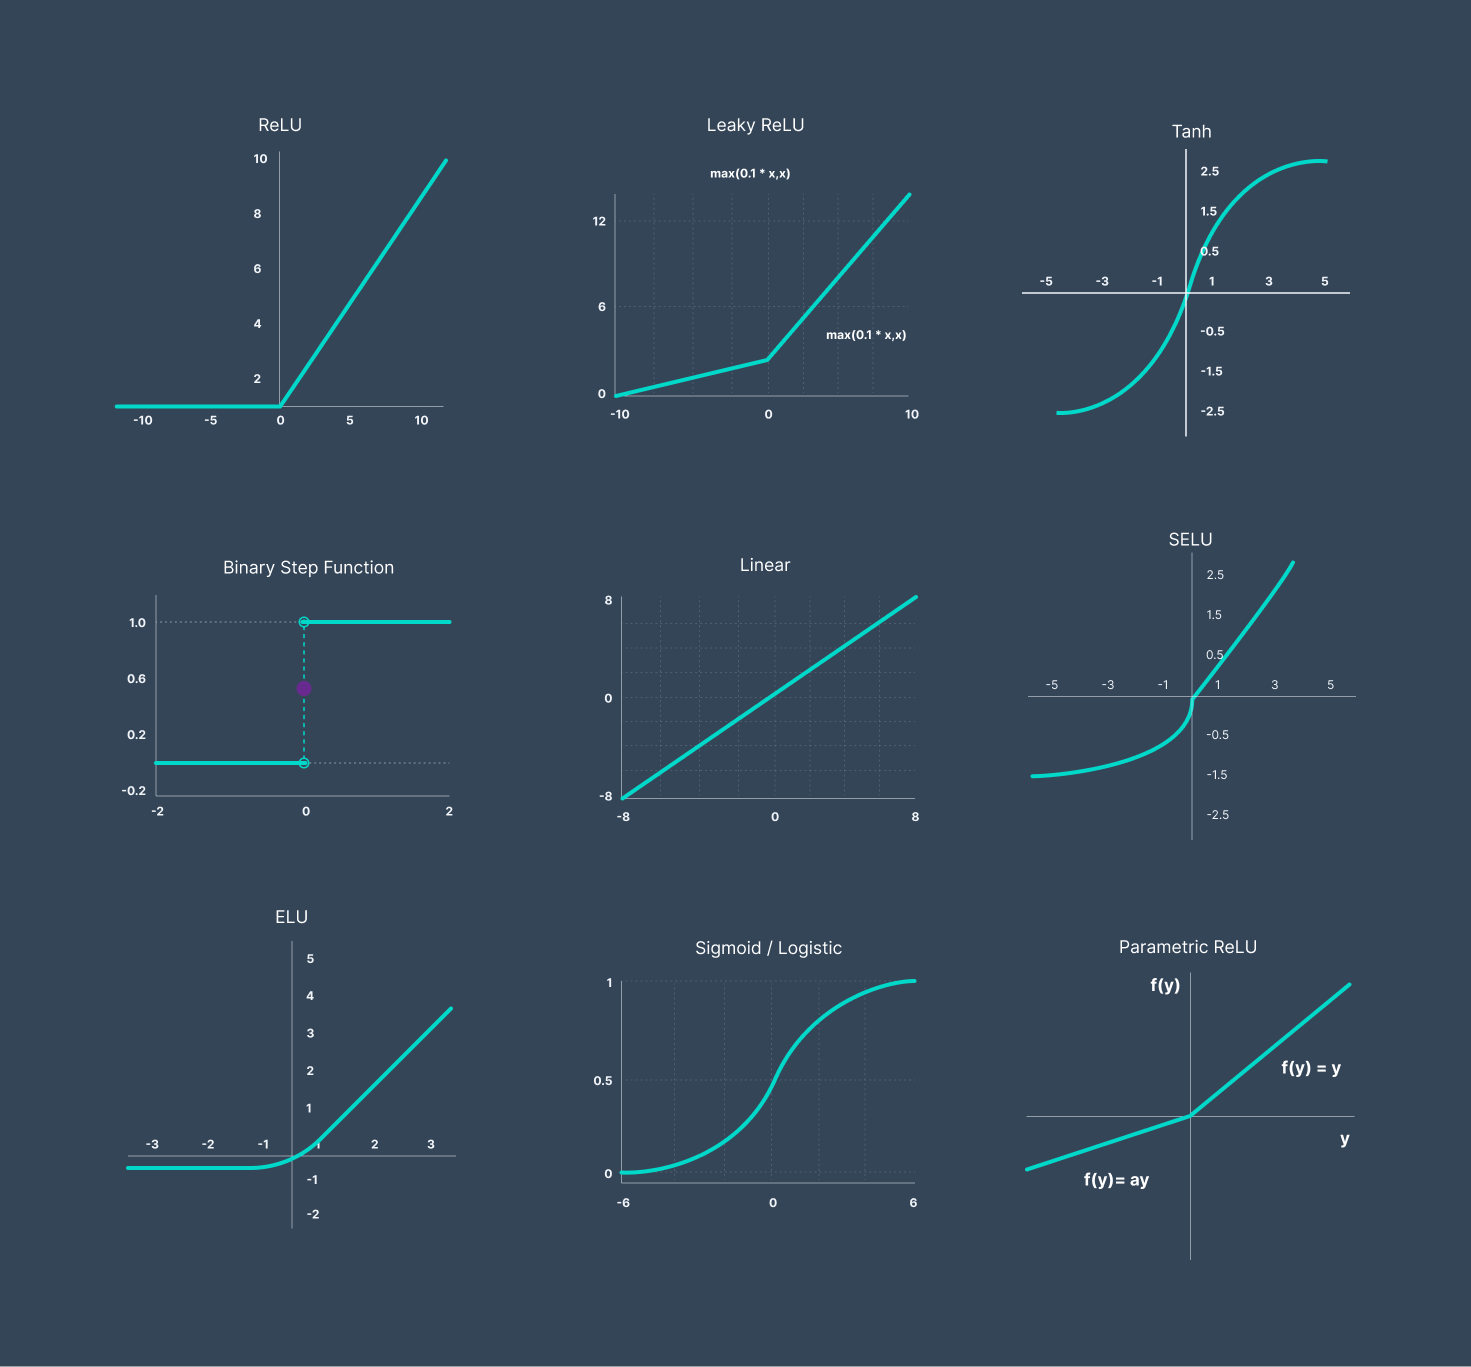
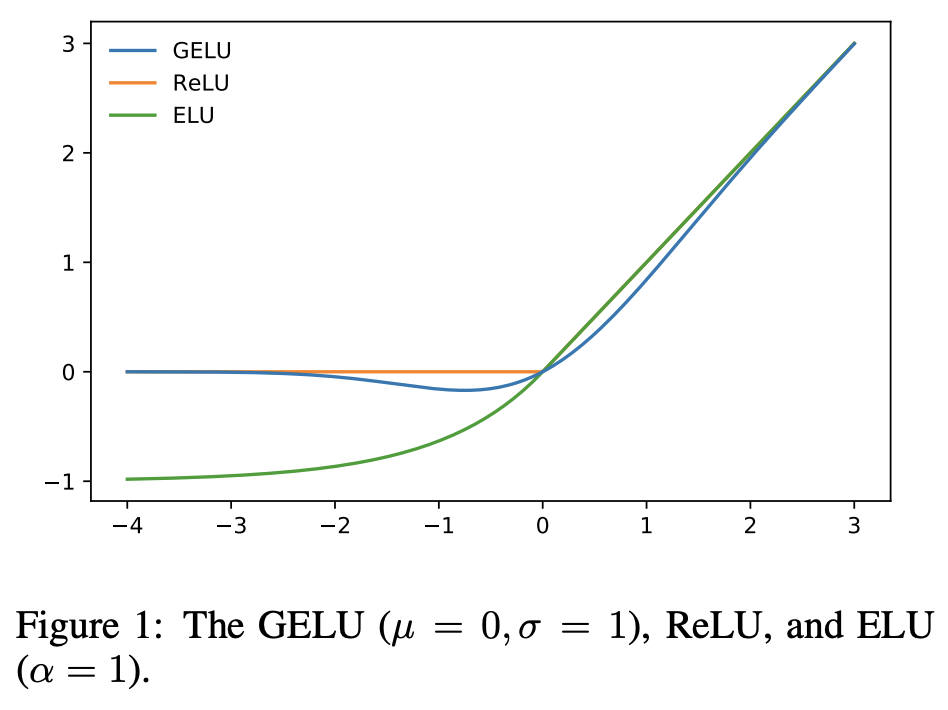

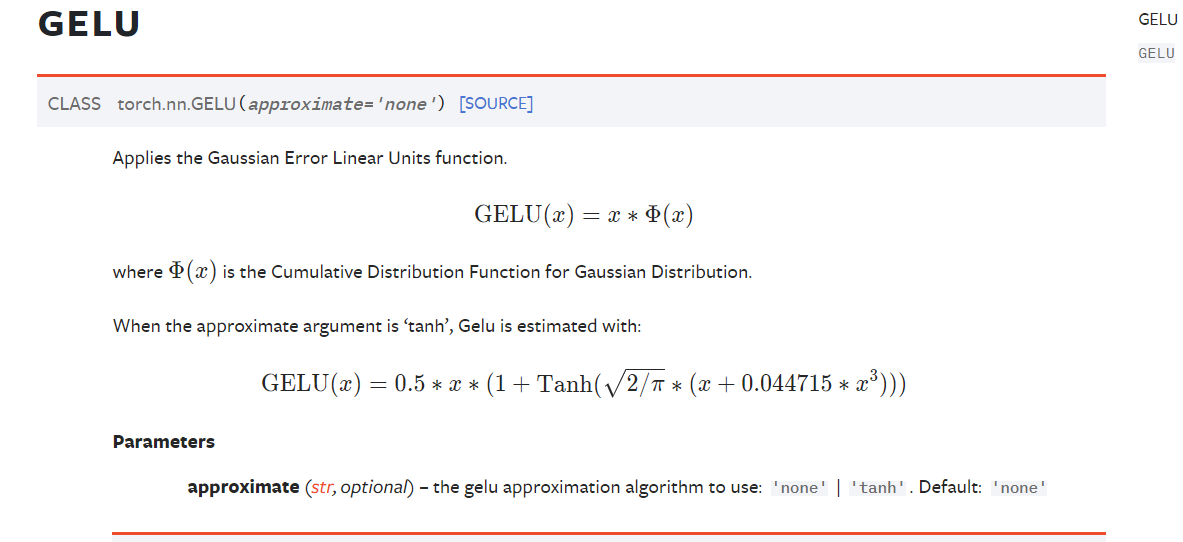

In [ ]:
# version 3
# addMLP class
# here change in from relu to gelu 

# problem with relu 
# dead relu neuron pronblem
# any activation fall in the flat reasion of relu will get gradiant value as 0 there will be no change .
# there is no develpop of adaptation

# were as gelu always contribute local gradiants

import os
import math
import time
import inspect
from dataclasses import dataclass
import torch
import torch.nn as nn
from torch.nn import functional as F
#from hellaswag import render_example, iterate_examples

class MLP(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.c_fc    = nn.Linear(config.n_embd, 4 * config.n_embd)
        self.gelu    = nn.GELU(approximate='tanh')
        self.c_proj  = nn.Linear(4 * config.n_embd, config.n_embd)
        self.c_proj.NANOGPT_SCALE_INIT = 1

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        return x



class Block(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.ln_1 = nn.LayerNorm(config.n_embd)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = nn.LayerNorm(config.n_embd)
        self.mlp = MLP(config)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x
    


@dataclass
class GPTConfig:
    block_size: int = 1024 # max sequence length
    vocab_size: int = 50257 # number of tokens: 50,000 BPE merges + 256 bytes tokens + 1 <|endoftext|> token
    n_layer: int = 12 # number of layers
    n_head: int = 12 # number of heads
    n_embd: int = 768 # embedding dimension


class GPT(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.config = config


        self.transformer = nn.ModuleDict(dict(
            wte = nn.Embedding(config.vocab_size, config.n_embd),
            wpe = nn.Embedding(config.block_size, config.n_embd),
            h = nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f = nn.LayerNorm(config.n_embd),
        ))
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)

In [32]:
# final version:


# version 5:

# Attention layer




import os
import math
import time
import inspect
from dataclasses import dataclass
import torch
import torch.nn as nn
from torch.nn import functional as F
#from hellaswag import render_example, iterate_examples




class CausalSelfAttention(nn.Module):

    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        # key, query, value projections for all heads, but in a batch
        self.c_attn = nn.Linear(config.n_embd, 3 * config.n_embd)
        # output projection
        self.c_proj = nn.Linear(config.n_embd, config.n_embd)
        self.c_proj.NANOGPT_SCALE_INIT = 1
        # regularization
        self.n_head = config.n_head
        self.n_embd = config.n_embd

    def forward(self, x):
        B, T, C = x.size() # batch size, sequence length, embedding dimensionality (n_embd)
        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        # nh is "number of heads", hs is "head size", and C (number of channels) = nh * hs
        # e.g. in GPT-2 (124M), n_head=12, hs=64, so nh*hs=C=768 channels in the Transformer
        qkv = self.c_attn(x)
        q, k, v = qkv.split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        
        
        att = (q @ k.transpose(-2,-1)) * (1.0 / math.sqrt(k.size(-1)))
        att = att.masked_fill(self.bais[:,:,:T,:T] == 0, float('-inf'))
        att = F.softmax(att, dim=-1)
        y = att @ v  #(B, nh, T, T) * (B, nh, T, hs) -> (B, nh, T, hs)
        
        y = y.transpose(1,2).contigious().view(B, T, C)
        y = self.c_proj(y)
        return y
        
        # flash attention:

        # y = F.scaled_dot_product_attention(q, k, v, is_causal=True) # flash attention
        # y = y.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side
        # # output projection
        # y = self.c_proj(y)
        # return y

class MLP(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.c_fc    = nn.Linear(config.n_embd, 4 * config.n_embd)
        self.gelu    = nn.GELU(approximate='tanh')
        self.c_proj  = nn.Linear(4 * config.n_embd, config.n_embd)
        self.c_proj.NANOGPT_SCALE_INIT = 1

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        return x



class Block(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.ln_1 = nn.LayerNorm(config.n_embd)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = nn.LayerNorm(config.n_embd)
        self.mlp = MLP(config)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x
    


@dataclass
class GPTConfig:
    block_size: int = 1024 # max sequence length
    vocab_size: int = 50257 # number of tokens: 50,000 BPE merges + 256 bytes tokens + 1 <|endoftext|> token
    n_layer: int = 12 # number of layers
    n_head: int = 12 # number of heads
    n_embd: int = 768 # embedding dimension


class GPT(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.config = config


        self.transformer = nn.ModuleDict(dict(
            wte = nn.Embedding(config.vocab_size, config.n_embd),
            wpe = nn.Embedding(config.block_size, config.n_embd),
            h = nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f = nn.LayerNorm(config.n_embd),
        ))
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)


    

In [7]:
# final version: with training 


# version 5:

# Attention layer




import os
import math
import time
import inspect
from dataclasses import dataclass
import torch
import torch.nn as nn
from torch.nn import functional as F
#from hellaswag import render_example, iterate_examples




class CausalSelfAttention(nn.Module):

    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        # key, query, value projections for all heads, but in a batch
        self.c_attn = nn.Linear(config.n_embd, 3 * config.n_embd)
        # output projection
        self.c_proj = nn.Linear(config.n_embd, config.n_embd)
        self.c_proj.NANOGPT_SCALE_INIT = 1
        # regularization
        self.n_head = config.n_head
        self.n_embd = config.n_embd
        self.tri = torch.tril(torch.ones(block_size, block_size))

    def forward(self, x):
        B, T, C = x.size() # batch size, sequence length, embedding dimensionality (n_embd)
        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        # nh is "number of heads", hs is "head size", and C (number of channels) = nh * hs
        # e.g. in GPT-2 (124M), n_head=12, hs=64, so nh*hs=C=768 channels in the Transformer
        qkv = self.c_attn(x)
        q, k, v = qkv.split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        
        
        att = (q @ k.transpose(-2,-1)) * (1.0 / math.sqrt(k.size(-1)))
        att = att.masked_fill(self.bais[:,:,:T,:T] == 0, float('-inf'))
        att = F.softmax(att, dim=-1)
        y = att @ v  #(B, nh, T, T) * (B, nh, T, hs) -> (B, nh, T, hs)
        
        y = y.transpose(1,2).contigious().view(B, T, C)
        y = self.c_proj(y)
        return y
        
        # flash attention:

        # y = F.scaled_dot_product_attention(q, k, v, is_causal=True) # flash attention
        # y = y.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side
        # # output projection
        # y = self.c_proj(y)
        # return y

class MLP(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.c_fc    = nn.Linear(config.n_embd, 4 * config.n_embd)
        self.gelu    = nn.GELU(approximate='tanh')
        self.c_proj  = nn.Linear(4 * config.n_embd, config.n_embd)
        self.c_proj.NANOGPT_SCALE_INIT = 1

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        return x



class Block(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.ln_1 = nn.LayerNorm(config.n_embd)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = nn.LayerNorm(config.n_embd)
        self.mlp = MLP(config)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x
    


@dataclass
class GPTConfig:
    block_size: int = 1024 # max sequence length
    vocab_size: int = 50257 # number of tokens: 50,000 BPE merges + 256 bytes tokens + 1 <|endoftext|> token
    n_layer: int = 12 # number of layers
    n_head: int = 12 # number of heads
    n_embd: int = 768 # embedding dimension


class GPT(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.config = config


        self.transformer = nn.ModuleDict(dict(
            wte = nn.Embedding(config.vocab_size, config.n_embd),
            wpe = nn.Embedding(config.block_size, config.n_embd),
            h = nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f = nn.LayerNorm(config.n_embd),
        ))
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)


    @classmethod
    def from_pretrained(cls, model_type):
        """Loads pretrained GPT-2 model weights from huggingface"""
        assert model_type in {'gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl'}
        from transformers import GPT2LMHeadModel
        print("loading weights from pretrained gpt: %s" % model_type)

        # n_layer, n_head and n_embd are determined from model_type
        config_args = {
            'gpt2':         dict(n_layer=12, n_head=12, n_embd=768),  # 124M params
            'gpt2-medium':  dict(n_layer=24, n_head=16, n_embd=1024), # 350M params
            'gpt2-large':   dict(n_layer=36, n_head=20, n_embd=1280), # 774M params
            'gpt2-xl':      dict(n_layer=48, n_head=25, n_embd=1600), # 1558M params
        }[model_type]
        config_args['vocab_size'] = 50257 # always 50257 for GPT model checkpoints
        config_args['block_size'] = 1024 # always 1024 for GPT model checkpoints
        # create a from-scratch initialized minGPT model
        config = GPTConfig(**config_args)
        model = GPT(config)
        sd = model.state_dict()
        sd_keys = sd.keys()
        sd_keys = [k for k in sd_keys if not k.endswith('.attn.bias')] # discard this mask / buffer, not a param

        # init a huggingface/transformers model
        model_hf = GPT2LMHeadModel.from_pretrained(model_type)
        sd_hf = model_hf.state_dict()

        # copy while ensuring all of the parameters are aligned and match in names and shapes
        sd_keys_hf = sd_hf.keys()
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.masked_bias')] # ignore these, just a buffer
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.bias')] # same, just the mask (buffer)
        transposed = ['attn.c_attn.weight', 'attn.c_proj.weight', 'mlp.c_fc.weight', 'mlp.c_proj.weight']
        # basically the openai checkpoints use a "Conv1D" module, but we only want to use a vanilla Linear
        # this means that we have to transpose these weights when we import them
        assert len(sd_keys_hf) == len(sd_keys), f"mismatched keys: {len(sd_keys_hf)} != {len(sd_keys)}"
        for k in sd_keys_hf:
            if any(k.endswith(w) for w in transposed):
                # special treatment for the Conv1D weights we need to transpose
                assert sd_hf[k].shape[::-1] == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k].t())
            else:
                # vanilla copy over the other parameters
                assert sd_hf[k].shape == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k])

        return model


# ---------------------------------------------------------------------
model = GPT.from_pretrained('gpt2')
print("'did't crashed!!!'")

loading weights from pretrained gpt: gpt2
'did't crashed!!!'


In [8]:
model

GPT(
  (transformer): ModuleDict(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (h): ModuleList(
      (0-11): 12 x Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): CausalSelfAttention(
          (c_attn): Linear(in_features=768, out_features=2304, bias=True)
          (c_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Linear(in_features=768, out_features=3072, bias=True)
          (gelu): GELU(approximate='tanh')
          (c_proj): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [9]:
print(sum(params.numel() for params in model.parameters())/1000000,'M')

163.037184 M


In [6]:

print(sum(params.numel() for params in model_hf.parameters())/1000000,'M')

124.439808 M


In [23]:
# final version: with training 


# version 5:

# Attention layer




import os
import math
import time
import inspect
from dataclasses import dataclass
import torch
import torch.nn as nn
from torch.nn import functional as F
#from hellaswag import render_example, iterate_examples




class CausalSelfAttention(nn.Module):

    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        # key, query, value projections for all heads, but in a batch
        self.c_attn = nn.Linear(config.n_embd, 3 * config.n_embd)
        # output projection
        self.c_proj = nn.Linear(config.n_embd, config.n_embd)
        self.c_proj.NANOGPT_SCALE_INIT = 1
        # regularization
        self.n_head = config.n_head
        self.n_embd = config.n_embd
   

    def forward(self, x):
        B, T, C = x.size() # batch size, sequence length, embedding dimensionality (n_embd)
        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        # nh is "number of heads", hs is "head size", and C (number of channels) = nh * hs
        # e.g. in GPT-2 (124M), n_head=12, hs=64, so nh*hs=C=768 channels in the Transformer
        qkv = self.c_attn(x)
        q, k, v = qkv.split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        
        
        # att = (q @ k.transpose(-2,-1)) * (1.0 / math.sqrt(k.size(-1)))
        # att = att.masked_fill(self.tri[:,:,:T,:T] == 0, float('-inf'))
        # att = F.softmax(att, dim=-1)
        # y = att @ v  #(B, nh, T, T) * (B, nh, T, hs) -> (B, nh, T, hs)
        
        # y = y.transpose(1,2).contigious().view(B, T, C)
        # y = self.c_proj(y)
        # return y
        
        # flash attention:

        y = F.scaled_dot_product_attention(q, k, v, is_causal=True) # flash attention
        y = y.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side
        # output projection
        y = self.c_proj(y)
        return y

class MLP(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.c_fc    = nn.Linear(config.n_embd, 4 * config.n_embd)
        self.gelu    = nn.GELU(approximate='tanh')
        self.c_proj  = nn.Linear(4 * config.n_embd, config.n_embd)
        self.c_proj.NANOGPT_SCALE_INIT = 1

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        return x



class Block(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.ln_1 = nn.LayerNorm(config.n_embd)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = nn.LayerNorm(config.n_embd)
        self.mlp = MLP(config)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x
    


@dataclass
class GPTConfig:
    block_size: int = 1024 # max sequence length
    vocab_size: int = 50257 # number of tokens: 50,000 BPE merges + 256 bytes tokens + 1 <|endoftext|> token
    n_layer: int = 12 # number of layers
    n_head: int = 12 # number of heads
    n_embd: int = 768 # embedding dimension


class GPT(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.config = config


        self.transformer = nn.ModuleDict(dict(
            wte = nn.Embedding(config.vocab_size, config.n_embd),
            wpe = nn.Embedding(config.block_size, config.n_embd),
            h = nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f = nn.LayerNorm(config.n_embd),
        ))
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)


    def forward(self, idx, targets=None):
        # idx is of shape (B, T)
        B, T = idx.size()
        assert T <= self.config.block_size, f"Cannot forward sequence of length {T}, block size is only {self.config.block_size}"
        # forward the token and posisition embeddings
        pos = torch.arange(0, T, dtype=torch.long, device=idx.device) # shape (T)
        pos_emb = self.transformer.wpe(pos) # position embeddings of shape (T, n_embd)
        tok_emb = self.transformer.wte(idx) # token embeddings of shape (B, T, n_embd)
        x = tok_emb + pos_emb
        # forward the blocks of the transformer
        for block in self.transformer.h:
            x = block(x)
        # forward the final layernorm and the classifier
        x = self.transformer.ln_f(x)
        logits = self.lm_head(x) # (B, T, vocab_size)
        loss = None
        if targets is not None:
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1))
        return logits, loss


    @classmethod
    def from_pretrained(cls, model_type):
        """Loads pretrained GPT-2 model weights from huggingface"""
        assert model_type in {'gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl'}
        from transformers import GPT2LMHeadModel
        print("loading weights from pretrained gpt: %s" % model_type)

        # n_layer, n_head and n_embd are determined from model_type
        config_args = {
            'gpt2':         dict(n_layer=12, n_head=12, n_embd=768),  # 124M params
            'gpt2-medium':  dict(n_layer=24, n_head=16, n_embd=1024), # 350M params
            'gpt2-large':   dict(n_layer=36, n_head=20, n_embd=1280), # 774M params
            'gpt2-xl':      dict(n_layer=48, n_head=25, n_embd=1600), # 1558M params
        }[model_type]
        config_args['vocab_size'] = 50257 # always 50257 for GPT model checkpoints
        config_args['block_size'] = 1024 # always 1024 for GPT model checkpoints
        # create a from-scratch initialized minGPT model
        config = GPTConfig(**config_args)
        model = GPT(config)
        sd = model.state_dict()
        sd_keys = sd.keys()
        sd_keys = [k for k in sd_keys if not k.endswith('.attn.bias')] # discard this mask / buffer, not a param

        # init a huggingface/transformers model
        model_hf = GPT2LMHeadModel.from_pretrained(model_type)
        sd_hf = model_hf.state_dict()

        # copy while ensuring all of the parameters are aligned and match in names and shapes
        sd_keys_hf = sd_hf.keys()
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.masked_bias')] # ignore these, just a buffer
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.bias')] # same, just the mask (buffer)
        transposed = ['attn.c_attn.weight', 'attn.c_proj.weight', 'mlp.c_fc.weight', 'mlp.c_proj.weight']
        # basically the openai checkpoints use a "Conv1D" module, but we only want to use a vanilla Linear
        # this means that we have to transpose these weights when we import them
        assert len(sd_keys_hf) == len(sd_keys), f"mismatched keys: {len(sd_keys_hf)} != {len(sd_keys)}"
        for k in sd_keys_hf:
            if any(k.endswith(w) for w in transposed):
                # special treatment for the Conv1D weights we need to transpose
                assert sd_hf[k].shape[::-1] == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k].t())
            else:
                # vanilla copy over the other parameters
                assert sd_hf[k].shape == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k])

        return model


# ---------------------------------------------------------------------
model = GPT.from_pretrained('gpt2')
print("'did't crashed!!!'")

loading weights from pretrained gpt: gpt2
'did't crashed!!!'


In [24]:
# let's instead sample manually
import torch
from torch.nn import functional as F

device =  'cuda ' if torch.cuda.is_available() else 'cpu'

model = GPT.from_pretrained("gpt2") # 124M
model.eval()
model.to(device)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
tokens = [15496, 11, 314, 1101, 257, 3303, 2746, 11] # "Hello, I'm a language model,"
tokens = torch.tensor(tokens, dtype=torch.long) # (8,)
tokens = tokens.unsqueeze(0).repeat(5, 1) # (5, 8)
x = tokens.to(device)

# generate!
while x.size(1) < 30: # max_length=30
    # forward the model to get the logits
    with torch.no_grad():
        logits = model(x)[0] # (B, T, vocab_size)
        # take the logits at the last position
        logits = logits[:, -1, :] # (B, vocab_size)
        # get the probabilities
        probs = F.softmax(logits, dim=-1)
        # do top-k sampling of 50 (huggingface pipeline default)
        # topk_probs here becomes (5, 50), topk_indices is (5, 50)
        topk_probs, topk_indices = torch.topk(probs, 50, dim=-1)
        # select a token from the top-k probabilities
        # note: multinomial does not demand the input to sum to 1
        ix = torch.multinomial(topk_probs, 1) # (B, 1)
        # gather the corresponding indices
        xcol = torch.gather(topk_indices, -1, ix) # (B, 1)
        # append to the sequence
        x = torch.cat((x, xcol), dim=1)

# print the generated text
import tiktoken
enc = tiktoken.get_encoding('gpt2')
for i in range(5):
    tokens = x[i, :30].tolist()
    decoded = enc.decode(tokens)
    print(">", decoded)

loading weights from pretrained gpt: gpt2
> Hello, I'm a language model, not a programming platform! I just make decisions based on other projects. I try to do that."


> Hello, I'm a language model, a kind of a "first class citizen" of the world and a person that comes from a much more egalitarian
> Hello, I'm a language model, and I'm starting to talk about the notion of the syntax, and I'm also working on an extension that
> Hello, I'm a language model, because I'm writing real-time. I'm writing all languages. And I'm working with languages for me
> Hello, I'm a language model, I don't know where to begin but I know there is a big deal going on with our society. What


In [25]:
num_retrun_sequences = 5
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode("hi manish is here")
tokens = torch.tensor(tokens, dtype=torch.long)
tokens = tokens.unsqueeze(0).repeat(num_retrun_sequences, 1)
x = tokens.to(device)

In [26]:
x

tensor([[5303,  582,  680,  318,  994],
        [5303,  582,  680,  318,  994],
        [5303,  582,  680,  318,  994],
        [5303,  582,  680,  318,  994],
        [5303,  582,  680,  318,  994]])

In [27]:
# generate!
while x.size(1) < 30: # max_length=30
    # forward the model to get the logits
    with torch.no_grad():
        logits = model(x)[0] # (B, T, vocab_size)
        # take the logits at the last position
        logits = logits[:, -1, :] # (B, vocab_size)
        # get the probabilities
        probs = F.softmax(logits, dim=-1)
        # do top-k sampling of 50 (huggingface pipeline default)
        # topk_probs here becomes (5, 50), topk_indices is (5, 50)
        topk_probs, topk_indices = torch.topk(probs, 50, dim=-1)
        # select a token from the top-k probabilities
        # note: multinomial does not demand the input to sum to 1
        ix = torch.multinomial(topk_probs, 1) # (B, 1)
        # gather the corresponding indices
        xcol = torch.gather(topk_indices, -1, ix) # (B, 1)
        # append to the sequence
        x = torch.cat((x, xcol), dim=1)

# print the generated text
import tiktoken
enc = tiktoken.get_encoding('gpt2')
for i in range(5):
    tokens = x[i, :30].tolist()
    decoded = enc.decode(tokens)
    print(">", decoded)

> hi manish is here. Not sure if I am being sarcastic or my name is still there. It would take more than the last couple of minutes
> hi manish is here to make this case, you know I think I'm right. I think those people out there have got a good chance here
> hi manish is here to take me and go home with my family. You won't believe they've been helping him for years..."

As
> hi manish is here to say: I found a great deal of good in your book.

I suppose you did have some work in that
> hi manish is here. We're not going to talk to each other again. I have to be honest with you guys, and we will fight


In [29]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'

# in macbook
if hasattr(torch.backends,'mps') and torch.backends.mps.is_available():
    device = 'mps'

print(f"using Device: {device}")

using Device: cpu


In [36]:
# dataseet
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()


data =text[:1000]
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [46]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(data)
print(f"token:{tokens[:24]}")

token:[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [50]:
import torch
buf = torch.tensor(tokens[:24])
print(f'{buf.shape=}')
x = buf.view(4,6)
print(x)
print(f"{x.shape}")

buf.shape=torch.Size([24])
tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
torch.Size([4, 6])


In [56]:
import torch
buf = torch.tensor(tokens[:24 + 1])
print(f'{buf.shape=}')
x = buf[:-1].view(4,6)
y = buf[1:].view(4,6)
print(x,'\n',y)
print(f"{x.shape} \n {y.shape}")

buf.shape=torch.Size([25])
tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]]) 
 tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])
torch.Size([4, 6]) 
 torch.Size([4, 6])


In [72]:
# let's instead sample manually
import torch
from torch.nn import functional as F
import tiktoken
torch.manual_seed(42)
torch.cuda.manual_seed(42)

device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
# in macbook
if hasattr(torch.backends,'mps') and torch.backends.mps.is_available():
    device = 'mps'
print(f"using Device: {device}")


enc = tiktoken.get_encoding('gpt2')

# dataseet
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()
text =text[:1000]
#print(text[:100])
tokens = enc.encode(text)
print(f"token:{tokens[:24]}")

B, T = 4, 32

import torch
buf = torch.tensor(tokens[:B*T + 1])
buf = buf.to(device)
print(f'{buf.shape=}')
x = buf[:-1].view(B,T)
y = buf[1:].view(B,T)
print(f"input:{x.shape}\nout:{y.shape}")



model = GPT(GPTConfig())
model.to(device)
logits, loss = model(x)
print(f"logits:{logits.shape}")
print(f"Loss:{loss}")

using Device: cpu
token:[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]
buf.shape=torch.Size([129])
input:torch.Size([4, 32])
out:torch.Size([4, 32])
logits:torch.Size([4, 32, 50257])
Loss:None


In [73]:
# loss calcuation:

model = GPT(GPTConfig())
model.to(device)
logits, loss = model(x, y)
print(f"logits:{logits.shape}")
print(f"Loss:{loss}")


#below loss is the starting loss it should be generated from equal prob of next token
# from the vbocab_size = 50257
# neg log brob = -log(1/vocab_size) = 10.82
# we are having also around the intial loss above
# so its a good starting point '

logits:torch.Size([4, 32, 50257])
Loss:11.039793014526367


In [75]:
# optimization:
#for faster optimisation adm
# zero grad to start with zero grads
# before backprop bcz the
# back prop accumelates the gradients

optimizer = torch.optim.AdamW(model.parameters(), lr = 3e-4)

for i in range(50):
    optimizer.zero_grad()
    logits, loss = model(x,y)
    loss.backward()
    optimizer.step()
    print(f"step{i}, loss: {loss.item()}")

       

step0, loss: 11.039793014526367
step1, loss: 6.663155555725098
step2, loss: 4.343607425689697
step3, loss: 2.6632022857666016
step4, loss: 1.5427067279815674
step5, loss: 0.8597836494445801
step6, loss: 0.473564088344574
step7, loss: 0.27063146233558655
step8, loss: 0.1773260235786438
step9, loss: 0.11996470391750336
step10, loss: 0.08219089359045029
step11, loss: 0.062042899429798126
step12, loss: 0.04921187087893486
step13, loss: 0.03784295916557312
step14, loss: 0.030818378552794456
step15, loss: 0.027197225019335747
step16, loss: 0.024225588887929916
step17, loss: 0.021007582545280457
step18, loss: 0.018175384029746056
step19, loss: 0.01597413420677185
step20, loss: 0.01426058541983366
step21, loss: 0.012905433773994446
step22, loss: 0.011744610033929348
step23, loss: 0.010660342872142792
step24, loss: 0.009649245999753475
step25, loss: 0.008754722774028778
step26, loss: 0.007990134879946709
step27, loss: 0.007341053336858749
step28, loss: 0.006789481267333031
step29, loss: 0.00631

In [91]:
# from above loss we can see that the model is getting single batch ']
# its memorizing it

# create dataloader

class DataLoaderLite:
    def __init__(self, B, T):
        self.B = B
        self.T = T

        # dataseet
        with open('input.txt', 'r', encoding='utf-8') as f:
            text = f.read()
        enc = tiktoken.get_encoding('gpt2')
        self.tokens = enc.encode(text)
        print(f"loaded {len(self.tokens)} tokens")
        print(f"1 epoch = {len(self.tokens) // (B*T)} batches")

        self.current_postion = 0


    def next_batch(self):
        B, T = self.B, self.T
        buf = torch.tensor(self.tokens[self.current_postion : self.current_postion+B*T+1])
        
        x = (buf[:-1]).view(B, T)
        y = (buf[1:]).view(B,T)
        self.current_postion += B*T

        if self.current_postion + (B*T+1) > len(self.tokens):
            self.current_postion = 0
        return x, y


     

train_loader = DataLoaderLite(B=4, T=32) 
x, y = train_loader.next_batch()
print(x.shape, y.shape)

loaded 338025 tokens
1 epoch = 2640 batches
torch.Size([4, 32]) torch.Size([4, 32])


In [92]:
# use of dataloder in training loop
optimizer = torch.optim.AdamW(model.parameters(), lr = 3e-4)

for i in range(50):
    x, y = train_loader.next_batch()
    x, y = x.to(device), y.to(device)
    optimizer.zero_grad()
    logits, loss = model(x,y)
    loss.backward()
    optimizer.step()
    print(f"step{i}, loss: {loss.item()}")


step0, loss: 10.611387252807617
step1, loss: 8.546494483947754
step2, loss: 8.989723205566406
step3, loss: 8.013957977294922
step4, loss: 7.594661712646484
step5, loss: 8.70281982421875
step6, loss: 8.160113334655762
step7, loss: 7.85351037979126
step8, loss: 7.7634406089782715
step9, loss: 8.163310050964355
step10, loss: 7.119351863861084
step11, loss: 7.549458980560303
step12, loss: 7.244383335113525
step13, loss: 7.373308181762695
step14, loss: 7.230459690093994
step15, loss: 7.32158088684082
step16, loss: 8.206392288208008
step17, loss: 6.985995769500732
step18, loss: 7.686485290527344
step19, loss: 7.437499046325684
step20, loss: 7.6490278244018555
step21, loss: 6.228034496307373
step22, loss: 6.677573204040527
step23, loss: 6.590367794036865
step24, loss: 6.349073886871338
step25, loss: 6.413578510284424
step26, loss: 7.483705043792725
step27, loss: 6.843062400817871
step28, loss: 6.652309417724609
step29, loss: 6.877216339111328
step30, loss: 7.058653354644775
step31, loss: 6.95

In [ ]:
# now it will not overfit loss
# loss will decrease but not so low

In [ ]:
# in the original papaer attention all i need and GPT 
# their is weight sharing scheam
# in the below figure
# the block output encoding and the last block linear shares
# the same weight matrix
# i.e mention in papaer inm Ofir Press and Lior Wolf  papaer
# 1:10:05

# in the vbackward pass we ll get the contribution in gradiants
# from bothe the layers classifiers as well as from embedding layer

# 

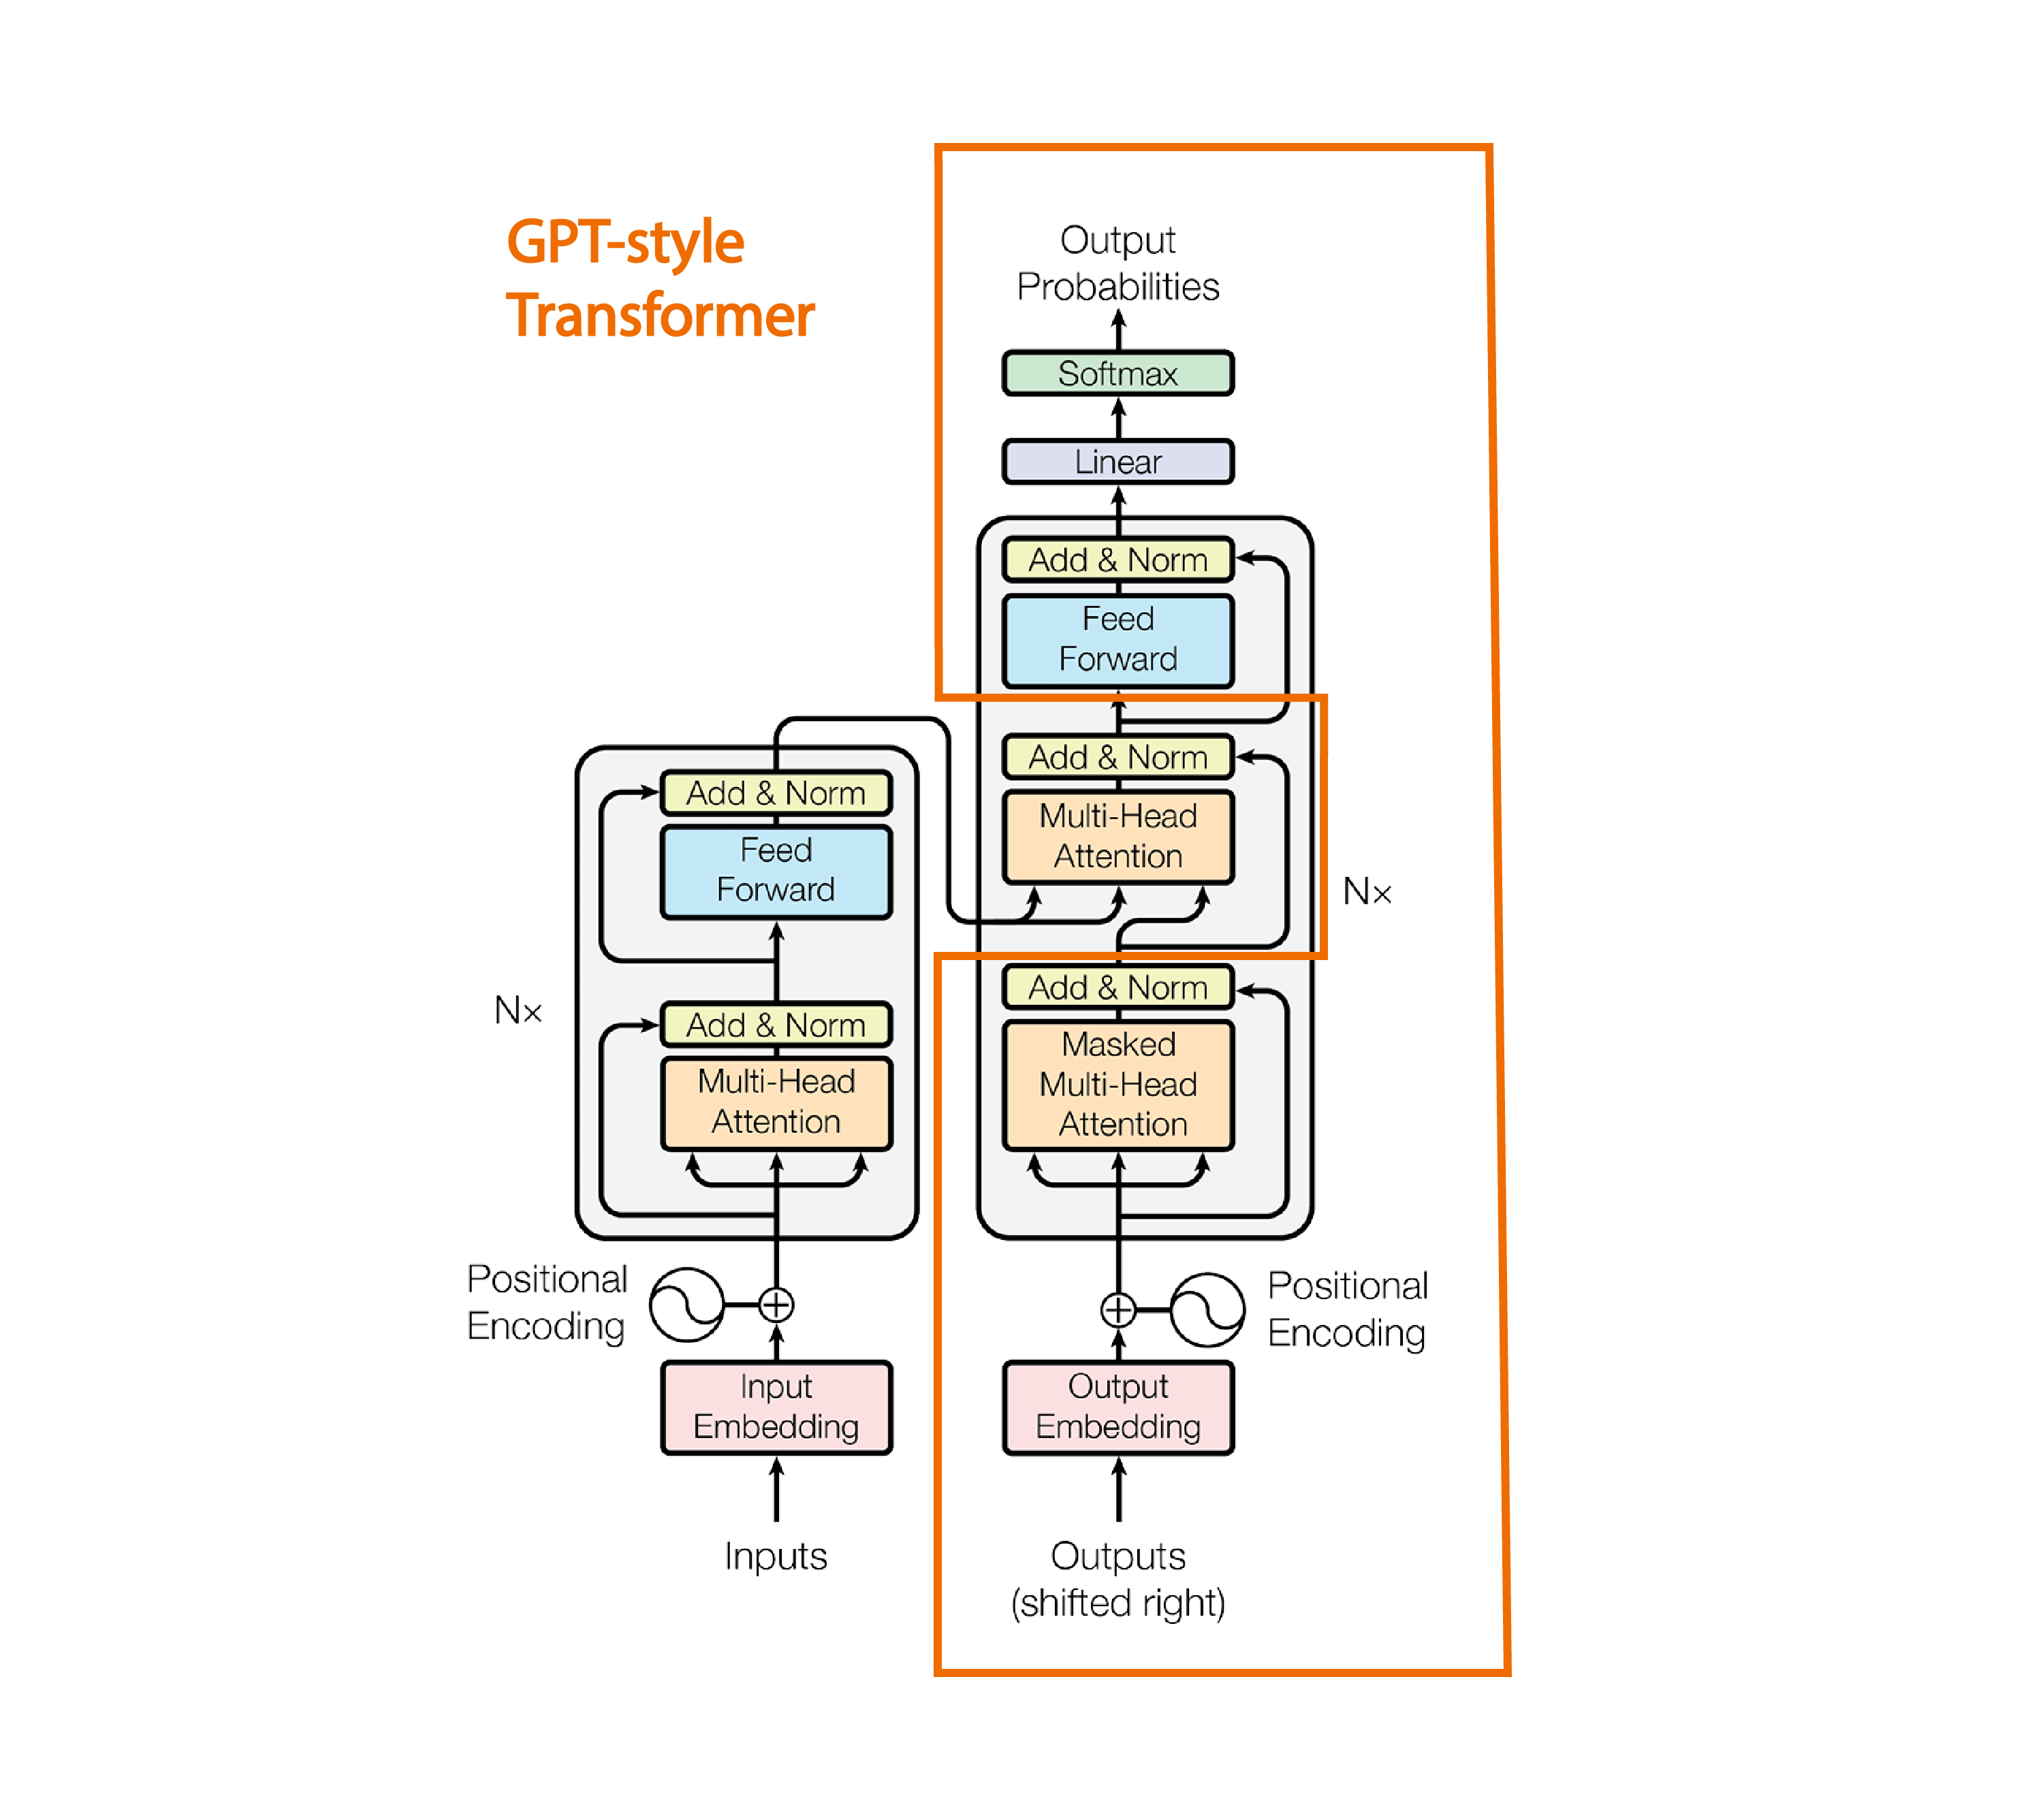

In [97]:
# from below you can see both are same
print(sd_hf["lm_head.weight"].shape)
print(sd_hf["transformer.wte.weight"].shape)

torch.Size([50257, 768])
torch.Size([50257, 768])


In [98]:
(sd_hf["lm_head.weight"] == sd_hf["transformer.wte.weight"]).all()

tensor(True)

In [99]:
print(sd_hf["lm_head.weight"].data_ptr())
print(sd_hf["transformer.wte.weight"].data_ptr())

4692453097728
4692453097728


In [100]:
# so will do modification in our model class
# we need to add one line in code 'ArithmeticError# weight sharing scheme


# self.transformer.wte.weight = self.lm_head.weight

In [113]:
# final version: with training 


# version 5:

# Attention layer




import os
import math
import time
import inspect
from dataclasses import dataclass
import torch
import torch.nn as nn
from torch.nn import functional as F
#from hellaswag import render_example, iterate_examples




class CausalSelfAttention(nn.Module):

    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        # key, query, value projections for all heads, but in a batch
        self.c_attn = nn.Linear(config.n_embd, 3 * config.n_embd)
        # output projection
        self.c_proj = nn.Linear(config.n_embd, config.n_embd)
        self.c_proj.NANOGPT_SCALE_INIT = 1
        # regularization
        self.n_head = config.n_head
        self.n_embd = config.n_embd
   

    def forward(self, x):
        B, T, C = x.size() # batch size, sequence length, embedding dimensionality (n_embd)
        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        # nh is "number of heads", hs is "head size", and C (number of channels) = nh * hs
        # e.g. in GPT-2 (124M), n_head=12, hs=64, so nh*hs=C=768 channels in the Transformer
        qkv = self.c_attn(x)
        q, k, v = qkv.split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        
        
        # att = (q @ k.transpose(-2,-1)) * (1.0 / math.sqrt(k.size(-1)))
        # att = att.masked_fill(self.tri[:,:,:T,:T] == 0, float('-inf'))
        # att = F.softmax(att, dim=-1)
        # y = att @ v  #(B, nh, T, T) * (B, nh, T, hs) -> (B, nh, T, hs)
        
        # y = y.transpose(1,2).contigious().view(B, T, C)
        # y = self.c_proj(y)
        # return y
        
        # flash attention:

        y = F.scaled_dot_product_attention(q, k, v, is_causal=True) # flash attention
        y = y.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side
        # output projection
        y = self.c_proj(y)
        return y

class MLP(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.c_fc    = nn.Linear(config.n_embd, 4 * config.n_embd)
        self.gelu    = nn.GELU(approximate='tanh')
        self.c_proj  = nn.Linear(4 * config.n_embd, config.n_embd)
        self.c_proj.NANOGPT_SCALE_INIT = 1

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        return x

class Block(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.ln_1 = nn.LayerNorm(config.n_embd)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = nn.LayerNorm(config.n_embd)
        self.mlp = MLP(config)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x
    
@dataclass
class GPTConfig:
    block_size: int = 1024 # max sequence length
    vocab_size: int = 50257 # number of tokens: 50,000 BPE merges + 256 bytes tokens + 1 <|endoftext|> token
    n_layer: int = 12 # number of layers
    n_head: int = 12 # number of heads
    n_embd: int = 768 # embedding dimension

class GPT(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.config = config


        self.transformer = nn.ModuleDict(dict(
            wte = nn.Embedding(config.vocab_size, config.n_embd),
            wpe = nn.Embedding(config.block_size, config.n_embd),
            h = nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f = nn.LayerNorm(config.n_embd),
        ))
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)

        # weight sharing scheme
        self.transformer.wte.weight = self.lm_head.weight

        # init params
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            std = 0.02
            # below line is only to habndle weiht in MLP layer
            if hasattr(module, 'NANOGPT_SCALE_INIT'):
                std *= (2 * self.config.n_layer) ** -0.5
            torch.nn.init.normal_(module.weight, mean=0.0, std=std)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)


    def forward(self, idx, targets=None):
        # idx is of shape (B, T)
        B, T = idx.size()
        assert T <= self.config.block_size, f"Cannot forward sequence of length {T}, block size is only {self.config.block_size}"
        # forward the token and posisition embeddings
        pos = torch.arange(0, T, dtype=torch.long, device=idx.device) # shape (T)
        pos_emb = self.transformer.wpe(pos) # position embeddings of shape (T, n_embd)
        tok_emb = self.transformer.wte(idx) # token embeddings of shape (B, T, n_embd)
        x = tok_emb + pos_emb
        # forward the blocks of the transformer
        for block in self.transformer.h:
            x = block(x)
        # forward the final layernorm and the classifier
        x = self.transformer.ln_f(x)
        logits = self.lm_head(x) # (B, T, vocab_size)
        loss = None
        if targets is not None:
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1))
        return logits, loss


    @classmethod
    def from_pretrained(cls, model_type):
        """Loads pretrained GPT-2 model weights from huggingface"""
        assert model_type in {'gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl'}
        from transformers import GPT2LMHeadModel
        print("loading weights from pretrained gpt: %s" % model_type)

        # n_layer, n_head and n_embd are determined from model_type
        config_args = {
            'gpt2':         dict(n_layer=12, n_head=12, n_embd=768),  # 124M params
            'gpt2-medium':  dict(n_layer=24, n_head=16, n_embd=1024), # 350M params
            'gpt2-large':   dict(n_layer=36, n_head=20, n_embd=1280), # 774M params
            'gpt2-xl':      dict(n_layer=48, n_head=25, n_embd=1600), # 1558M params
        }[model_type]
        config_args['vocab_size'] = 50257 # always 50257 for GPT model checkpoints
        config_args['block_size'] = 1024 # always 1024 for GPT model checkpoints
        # create a from-scratch initialized minGPT model
        config = GPTConfig(**config_args)
        model = GPT(config)
        sd = model.state_dict()
        sd_keys = sd.keys()
        sd_keys = [k for k in sd_keys if not k.endswith('.attn.bias')] # discard this mask / buffer, not a param

        # init a huggingface/transformers model
        model_hf = GPT2LMHeadModel.from_pretrained(model_type)
        sd_hf = model_hf.state_dict()

        # copy while ensuring all of the parameters are aligned and match in names and shapes
        sd_keys_hf = sd_hf.keys()
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.masked_bias')] # ignore these, just a buffer
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.bias')] # same, just the mask (buffer)
        transposed = ['attn.c_attn.weight', 'attn.c_proj.weight', 'mlp.c_fc.weight', 'mlp.c_proj.weight']
        # basically the openai checkpoints use a "Conv1D" module, but we only want to use a vanilla Linear
        # this means that we have to transpose these weights when we import them
        assert len(sd_keys_hf) == len(sd_keys), f"mismatched keys: {len(sd_keys_hf)} != {len(sd_keys)}"
        for k in sd_keys_hf:
            if any(k.endswith(w) for w in transposed):
                # special treatment for the Conv1D weights we need to transpose
                assert sd_hf[k].shape[::-1] == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k].t())
            else:
                # vanilla copy over the other parameters
                assert sd_hf[k].shape == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k])

        return model


# ---------------------------------------------------------------------
model = GPT.from_pretrained('gpt2')
print("'did't crashed!!!'")

loading weights from pretrained gpt: gpt2
'did't crashed!!!'


In [102]:
print(sum(params.numel() for params in model.parameters())/1000000,'M')

124.439808 M


In [107]:
# from above you can see in the eailer version 
# total model params were 163M 
# now it got reduce to 163M params


In [ ]:
# nexr step to weight initalisation

# in GPT 
# they usinig 
#   for weight initalization they are usinig 
# std = 0.02
# normal distribution for weight
# bias initalise with 0

# token embeding initialzed / opstional encoding
# std = 0.02

# in layer norm 
# scale = 1
# offseet =0  these are bydefult in torch

# resone: for std 0.02

# bcz of havier initalization 
# ie 1/root(fanin)   fanin - no of inputs to the layer
# 1/root(768) ~ 0.02







# init params
# self.apply(self._init_weights)

# def _init_weights(self, module):
# if isinstance(module, nn.Linear):
#     std = 0.02
#     if hasattr(module, 'NANOGPT_SCALE_INIT'):
#         std *= (2 * self.config.n_layer) ** -0.5
#     torch.nn.init.normal_(module.weight, mean=0.0, std=std)
#     if module.bias is not None:
#         torch.nn.init.zeros_(module.bias)
# elif isinstance(module, nn.Embedding):
#     torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

In [110]:
# standard deviation grows inside the residual stream

# if hasattr(module, 'NANOGPT_SCALE_INIT'):
# #         std *= (2 * self.config.n_layer) ** -0.5




x = torch.zeros(768)
n = 100 # e.g. 100 layers
for i in range(n):
    x += torch.randn(768)

print(x.std())

tensor(9.8656)


In [111]:
# standard deviation grows inside the residual stream
x = torch.zeros(768)
n = 100 # e.g. 100 layers
for i in range(n):
    x += n**-0.5 * torch.randn(768)

print(x.std())


# this control the groth of activations in the residual path

tensor(1.0468)


# final  Code:

In [ ]:
# moidel.py 
#----------------------------------------------------------------------------------
import os
import math
import time
import inspect
from dataclasses import dataclass
import torch
import torch.nn as nn
from torch.nn import functional as F
#from hellaswag import render_example, iterate_examples




class CausalSelfAttention(nn.Module):

    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        # key, query, value projections for all heads, but in a batch
        self.c_attn = nn.Linear(config.n_embd, 3 * config.n_embd)
        # output projection
        self.c_proj = nn.Linear(config.n_embd, config.n_embd)
        self.c_proj.NANOGPT_SCALE_INIT = 1
        # regularization
        self.n_head = config.n_head
        self.n_embd = config.n_embd
   

    def forward(self, x):
        B, T, C = x.size() # batch size, sequence length, embedding dimensionality (n_embd)
        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        # nh is "number of heads", hs is "head size", and C (number of channels) = nh * hs
        # e.g. in GPT-2 (124M), n_head=12, hs=64, so nh*hs=C=768 channels in the Transformer
        qkv = self.c_attn(x)
        q, k, v = qkv.split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        
        
        # att = (q @ k.transpose(-2,-1)) * (1.0 / math.sqrt(k.size(-1)))
        # att = att.masked_fill(self.tri[:,:,:T,:T] == 0, float('-inf'))
        # att = F.softmax(att, dim=-1)
        # y = att @ v  #(B, nh, T, T) * (B, nh, T, hs) -> (B, nh, T, hs)
        
        # y = y.transpose(1,2).contigious().view(B, T, C)
        # y = self.c_proj(y)
        # return y
        
        # flash attention:

        y = F.scaled_dot_product_attention(q, k, v, is_causal=True) # flash attention
        y = y.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side
        # output projection
        y = self.c_proj(y)
        return y

class MLP(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.c_fc    = nn.Linear(config.n_embd, 4 * config.n_embd)
        self.gelu    = nn.GELU(approximate='tanh')
        self.c_proj  = nn.Linear(4 * config.n_embd, config.n_embd)
        self.c_proj.NANOGPT_SCALE_INIT = 1

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        return x

class Block(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.ln_1 = nn.LayerNorm(config.n_embd)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = nn.LayerNorm(config.n_embd)
        self.mlp = MLP(config)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x
    
@dataclass
class GPTConfig:
    block_size: int = 1024 # max sequence length
    vocab_size: int = 50257 # number of tokens: 50,000 BPE merges + 256 bytes tokens + 1 <|endoftext|> token
    n_layer: int = 12 # number of layers
    n_head: int = 12 # number of heads
    n_embd: int = 768 # embedding dimension

class GPT(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.config = config


        self.transformer = nn.ModuleDict(dict(
            wte = nn.Embedding(config.vocab_size, config.n_embd),
            wpe = nn.Embedding(config.block_size, config.n_embd),
            h = nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f = nn.LayerNorm(config.n_embd),
        ))
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)

        # weight sharing scheme
        self.transformer.wte.weight = self.lm_head.weight

        # init params
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            std = 0.02
            # below line is only to habndle weiht in MLP layer
            if hasattr(module, 'NANOGPT_SCALE_INIT'):
                std *= (2 * self.config.n_layer) ** -0.5
            torch.nn.init.normal_(module.weight, mean=0.0, std=std)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)


    def forward(self, idx, targets=None):
        # idx is of shape (B, T)
        B, T = idx.size()
        assert T <= self.config.block_size, f"Cannot forward sequence of length {T}, block size is only {self.config.block_size}"
        # forward the token and posisition embeddings
        pos = torch.arange(0, T, dtype=torch.long, device=idx.device) # shape (T)
        pos_emb = self.transformer.wpe(pos) # position embeddings of shape (T, n_embd)
        tok_emb = self.transformer.wte(idx) # token embeddings of shape (B, T, n_embd)
        x = tok_emb + pos_emb
        # forward the blocks of the transformer
        for block in self.transformer.h:
            x = block(x)
        # forward the final layernorm and the classifier
        x = self.transformer.ln_f(x)
        logits = self.lm_head(x) # (B, T, vocab_size)
        loss = None
        if targets is not None:
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1))
        return logits, loss


    @classmethod
    def from_pretrained(cls, model_type):
        """Loads pretrained GPT-2 model weights from huggingface"""
        assert model_type in {'gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl'}
        from transformers import GPT2LMHeadModel
        print("loading weights from pretrained gpt: %s" % model_type)

        # n_layer, n_head and n_embd are determined from model_type
        config_args = {
            'gpt2':         dict(n_layer=12, n_head=12, n_embd=768),  # 124M params
            'gpt2-medium':  dict(n_layer=24, n_head=16, n_embd=1024), # 350M params
            'gpt2-large':   dict(n_layer=36, n_head=20, n_embd=1280), # 774M params
            'gpt2-xl':      dict(n_layer=48, n_head=25, n_embd=1600), # 1558M params
        }[model_type]
        config_args['vocab_size'] = 50257 # always 50257 for GPT model checkpoints
        config_args['block_size'] = 1024 # always 1024 for GPT model checkpoints
        # create a from-scratch initialized minGPT model
        config = GPTConfig(**config_args)
        model = GPT(config)
        sd = model.state_dict()
        sd_keys = sd.keys()
        sd_keys = [k for k in sd_keys if not k.endswith('.attn.bias')] # discard this mask / buffer, not a param

        # init a huggingface/transformers model
        model_hf = GPT2LMHeadModel.from_pretrained(model_type)
        sd_hf = model_hf.state_dict()

        # copy while ensuring all of the parameters are aligned and match in names and shapes
        sd_keys_hf = sd_hf.keys()
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.masked_bias')] # ignore these, just a buffer
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.bias')] # same, just the mask (buffer)
        transposed = ['attn.c_attn.weight', 'attn.c_proj.weight', 'mlp.c_fc.weight', 'mlp.c_proj.weight']
        # basically the openai checkpoints use a "Conv1D" module, but we only want to use a vanilla Linear
        # this means that we have to transpose these weights when we import them
        assert len(sd_keys_hf) == len(sd_keys), f"mismatched keys: {len(sd_keys_hf)} != {len(sd_keys)}"
        for k in sd_keys_hf:
            if any(k.endswith(w) for w in transposed):
                # special treatment for the Conv1D weights we need to transpose
                assert sd_hf[k].shape[::-1] == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k].t())
            else:
                # vanilla copy over the other parameters
                assert sd_hf[k].shape == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k])

        return model


# ---------------------------------------------------------------------
model = GPT.from_pretrained('gpt2')
print("'did't crashed!!!'")

In [114]:
# train.py
#--------------------------------------------------------------------------

import torch
from torch.nn import functional as F
import tiktoken
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
# in macbook
if hasattr(torch.backends,'mps') and torch.backends.mps.is_available():
    device = 'mps'
print(f"using Device: {device}")




class DataLoaderLite:
    def __init__(self, B, T):
        self.B = B
        self.T = T

        # dataseet
        with open('input.txt', 'r', encoding='utf-8') as f:
            text = f.read()
        enc = tiktoken.get_encoding('gpt2')
        self.tokens = enc.encode(text)
        print(f"loaded {len(self.tokens)} tokens")
        print(f"1 epoch = {len(self.tokens) // (B*T)} batches")

        self.current_postion = 0


    def next_batch(self):
        B, T = self.B, self.T
        buf = torch.tensor(self.tokens[self.current_postion : self.current_postion+B*T+1])
        
        x = (buf[:-1]).view(B, T)
        y = (buf[1:]).view(B,T)
        self.current_postion += B*T

        if self.current_postion + (B*T+1) > len(self.tokens):
            self.current_postion = 0
        return x, y




train_loader = DataLoaderLite(B=4,T=32)

model = GPT(GPTConfig())
model.to(device)

# use of dataloder in training loop
optimizer = torch.optim.AdamW(model.parameters(), lr = 3e-4)
for i in range(50):
    x, y = train_loader.next_batch()
    x, y = x.to(device), y.to(device)
    optimizer.zero_grad()
    logits, loss = model(x,y)
    loss.backward()
    optimizer.step()
    print(f"step{i}, loss: {loss.item()}")



using Device: cpu
loaded 338025 tokens
1 epoch = 2640 batches
step0, loss: 11.008783340454102
step1, loss: 9.92422866821289
step2, loss: 8.877957344055176
step3, loss: 9.184955596923828
step4, loss: 8.670365333557129
step5, loss: 8.403951644897461
step6, loss: 9.085042953491211
step7, loss: 8.748676300048828
step8, loss: 8.230666160583496
step9, loss: 8.034976959228516
step10, loss: 8.39041805267334
step11, loss: 7.395387649536133
step12, loss: 7.935633659362793
step13, loss: 7.498258590698242
step14, loss: 7.558332920074463
step15, loss: 7.362813949584961
step16, loss: 7.4134955406188965
step17, loss: 8.313155174255371
step18, loss: 7.22255277633667
step19, loss: 7.791259765625
step20, loss: 7.55512809753418
step21, loss: 7.875575065612793
step22, loss: 6.382636070251465
step23, loss: 6.8389573097229
step24, loss: 6.832732200622559
step25, loss: 6.657804489135742
step26, loss: 6.76557731628418
step27, loss: 7.599311351776123
step28, loss: 7.163541316986084
step29, loss: 6.933970928192

In [115]:

# about gpu
# speedup the training process!!!!
#------------------------------------------------
# how to break code and do it in console
# add below line 
    # import code
    # code.interact(local = locals())

# check gpu
# nvidia-smi
# A100 80GB gpu
# for with 32float --  it achives 19.5TFLOPS performance  19 M floating point operations
# as the dtype of all the training process decreaser 
# from float 32  -> float16 -> int8
# the FLOPS increases to 312 to 624 from 19M

# int8 is used for inferenceing not in training
# reason: it has uniform spacing not matches the normal distribution

# so if we reduce the pricision we can increase the TFLOPS
# in gpu comput takes place in tensor cores

# GPU memory: capacity of gpu to store no of bits   80gb
# GPU memory bandwidth: rate at wich we can access that memory   19350GB/s


## tensor cores in A100
#------------------------------------
#--------------------------------------


# just an instruction in A100
# does metrix multiplication

# link NVIDIA A100 Tensor Core GPU Architecture
# https://images.nvidia.com/aem-dam/en-zz/Solutions/data-center/nvidia-ampere-architecture-whitepaper.pdf







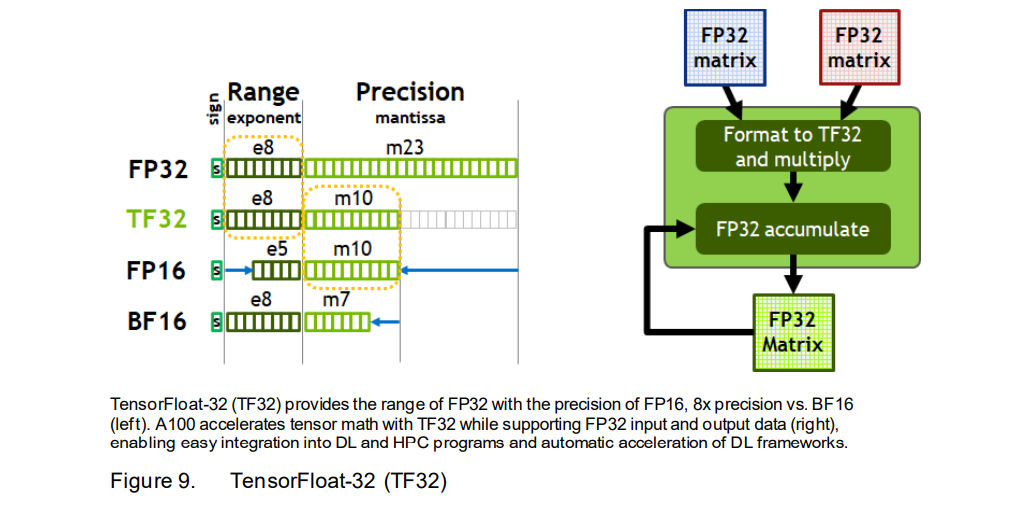

In [118]:
print(f"type of logits : {logits.dtype}")
# every thing is float 32 repersentation


type of logits : torch.float32


In [128]:
import time
#time calcuation of traininig 
train_loader = DataLoaderLite(B=4,T=32)

model = GPT(GPTConfig())
model.to(device)

# use of dataloder in training loop
optimizer = torch.optim.AdamW(model.parameters(), lr = 3e-4)
for i in range(50):

    t0 = time.time()

    x, y = train_loader.next_batch()
    x, y = x.to(device), y.to(device)
    optimizer.zero_grad()
    logits, loss = model(x,y)
    loss.backward()
    optimizer.step()
    # below line will wait for all the gpu operation to over
    if torch.cuda.is_available():
        torch.cuda.synchronize()
    t1 = time.time()
    dt = (t1 - t0) * 1000  # time diff in miliseconds
    tokens_per_sec = (train_loader.B * train_loader.T) / (t1 - t0)
    print(f"step{i}, loss: {loss.item()}, dt: {dt:.2f}ms, tok/sec: {tokens_per_sec:.2f}")


# first iteration dt is high bcz the
# torch we do different initalization bugfferes etc

# tokens trough put 
# how many tokens we are using for training and processing
# bcz we are chaninig the batch size 


loaded 338025 tokens
1 epoch = 2640 batches
step0, loss: 10.906237602233887, dt: 1795.54ms, tok/sec: 71.29
step1, loss: 9.723762512207031, dt: 1637.47ms, tok/sec: 78.17
step2, loss: 8.845829963684082, dt: 1868.94ms, tok/sec: 68.49
step3, loss: 9.115443229675293, dt: 2096.00ms, tok/sec: 61.07
step4, loss: 8.709872245788574, dt: 2016.99ms, tok/sec: 63.46
step5, loss: 8.340963363647461, dt: 2033.64ms, tok/sec: 62.94
step6, loss: 8.945292472839355, dt: 1926.29ms, tok/sec: 66.45
step7, loss: 8.751374244689941, dt: 1835.06ms, tok/sec: 69.75
step8, loss: 8.18258285522461, dt: 1890.74ms, tok/sec: 67.70
step9, loss: 7.928246974945068, dt: 1897.30ms, tok/sec: 67.46
step10, loss: 8.379849433898926, dt: 1878.85ms, tok/sec: 68.13
step11, loss: 7.434806823730469, dt: 1854.74ms, tok/sec: 69.01
step12, loss: 7.871453285217285, dt: 1770.23ms, tok/sec: 72.31
step13, loss: 7.43819522857666, dt: 1803.27ms, tok/sec: 70.98
step14, loss: 7.580628871917725, dt: 1897.19ms, tok/sec: 67.47
step15, loss: 7.396937

In [ ]:
# enable TF32: for gpu

# how to enable tf32 datatype
# below code willlk increase the token torugh put by 3x
# in gpu
#----------------------------
# when will shift from FP32 to TF2 
# the tokentroughput increases by 3 times 

torch.set_float32_matmul_precision('high')

In [129]:
import time
#time calcuation of traininig 
train_loader = DataLoaderLite(B=4,T=32)
torch.set_float32_matmul_precision('high')

model = GPT(GPTConfig())
model.to(device)

# use of dataloder in training loop
optimizer = torch.optim.AdamW(model.parameters(), lr = 3e-4)
for i in range(50):

    t0 = time.time()

    x, y = train_loader.next_batch()
    x, y = x.to(device), y.to(device)
    optimizer.zero_grad()
    logits, loss = model(x,y)
    loss.backward()
    optimizer.step()
    # below line will wait for all the gpu operation to over
    if torch.cuda.is_available():
        torch.cuda.synchronize()
    t1 = time.time()
    dt = (t1 - t0) * 1000  # time diff in miliseconds
    tokens_per_sec = (train_loader.B * train_loader.T) / (t1 - t0)
    print(f"step{i}, loss: {loss.item()}, dt: {dt:.2f}ms, tok/sec: {tokens_per_sec:.2f}")


# first iteration dt is high bcz the
# torch we do different initalization bugfferes etc

# tokens trough put 
# how many tokens we are using for training and processing
# bcz we are chaninig the batch size 


loaded 338025 tokens
1 epoch = 2640 batches
step0, loss: 10.934454917907715, dt: 1543.04ms, tok/sec: 82.95
step1, loss: 9.714509010314941, dt: 1549.70ms, tok/sec: 82.60
step2, loss: 9.455564498901367, dt: 1538.13ms, tok/sec: 83.22
step3, loss: 9.127947807312012, dt: 1597.03ms, tok/sec: 80.15
step4, loss: 8.628762245178223, dt: 1533.55ms, tok/sec: 83.47
step5, loss: 8.322612762451172, dt: 1579.29ms, tok/sec: 81.05
step6, loss: 8.969541549682617, dt: 1566.35ms, tok/sec: 81.72
step7, loss: 8.689177513122559, dt: 1488.92ms, tok/sec: 85.97
step8, loss: 8.049154281616211, dt: 1488.87ms, tok/sec: 85.97
step9, loss: 8.012007713317871, dt: 1623.56ms, tok/sec: 78.84
step10, loss: 8.352290153503418, dt: 1583.40ms, tok/sec: 80.84
step11, loss: 7.476502895355225, dt: 1490.73ms, tok/sec: 85.86
step12, loss: 7.8403496742248535, dt: 1436.41ms, tok/sec: 89.11
step13, loss: 7.393360614776611, dt: 1579.58ms, tok/sec: 81.03
step14, loss: 7.462156295776367, dt: 1511.42ms, tok/sec: 84.69
step15, loss: 7.274

In [ ]:
# FP16 setup:
#------------------------
# in FP 16 the mentisa remain same as in TF32 but the 
# exponent get croped 
# here range of exponent is reduce so conversion from FP32 
# which is having diferent range 
# in FP 16 we need extra gradient scaler  and other things

# than came BF16


# go thrugh 
# automatic mixed precision 
# https://pytorch.org/tutorials/recipes/recipes/amp_recipe.html


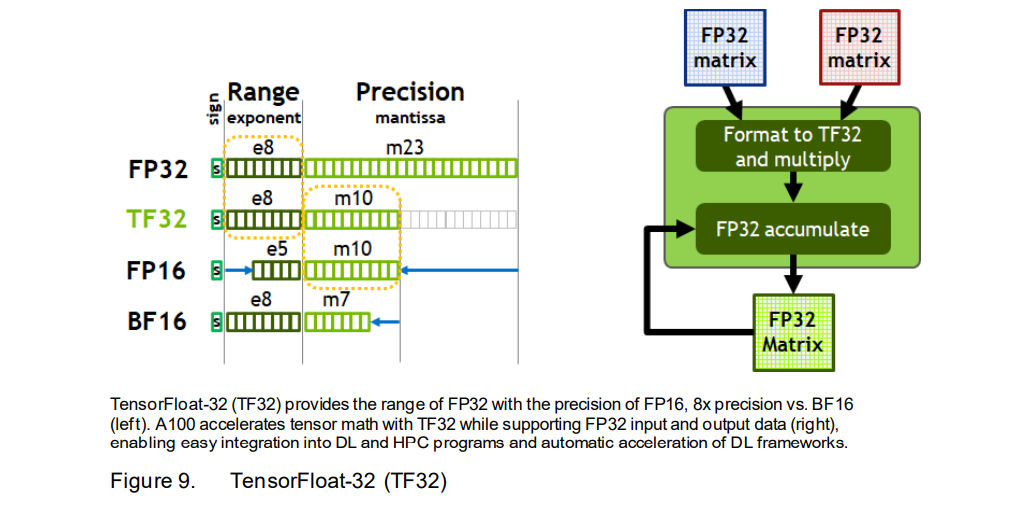

In [ ]:
# use of BF16#--------------


import time
#time calcuation of traininig 
train_loader = DataLoaderLite(B=4,T=32)
torch.set_float32_matmul_precision('high')

model = GPT(GPTConfig())
model.to(device)

# use of dataloder in training loop
optimizer = torch.optim.AdamW(model.parameters(), lr = 3e-4)
for i in range(50):

    t0 = time.time()

    x, y = train_loader.next_batch()
    x, y = x.to(device), y.to(device)
    optimizer.zero_grad()
    with torch.autocast(device_type=device, dtype=torch.bfloat16):
        logits, loss = model(x,y)
    loss.backward()
    optimizer.step()
    # below line will wait for all the gpu operation to over
    if torch.cuda.is_available():
        torch.cuda.synchronize()
    t1 = time.time()
    dt = (t1 - t0) * 1000  # time diff in miliseconds
    tokens_per_sec = (train_loader.B * train_loader.T) / (t1 - t0)
    print(f"step{i}, loss: {loss.item()}, dt: {dt:.2f}ms, tok/sec: {tokens_per_sec:.2f}")



# here activation will be in bf 16
# niot the model layers which will remain in the f32



In [132]:
# use of torch.compile to speed up training''ArithmeticError
# #---------------

# use of BF16#--------------


import time
#time calcuation of traininig 
train_loader = DataLoaderLite(B=4,T=32)


model = GPT(GPTConfig())
model.to(device)
model = torch.compile(model)

# use of dataloder in training loop
optimizer = torch.optim.AdamW(model.parameters(), lr = 3e-4)
for i in range(50):

    t0 = time.time()

    x, y = train_loader.next_batch()
    x, y = x.to(device), y.to(device)
    optimizer.zero_grad()

    logits, loss = model(x,y)
    loss.backward()
    optimizer.step()
    # below line will wait for all the gpu operation to over
    if torch.cuda.is_available():
        torch.cuda.synchronize()
    t1 = time.time()
    dt = (t1 - t0) * 1000  # time diff in miliseconds
    tokens_per_sec = (train_loader.B * train_loader.T) / (t1 - t0)
    print(f"step{i}, loss: {loss.item()}, dt: {dt:.2f}ms, tok/sec: {tokens_per_sec:.2f}")



# here activation will be in bf 16
# niot the model layers which will remain in the f32



loaded 338025 tokens
1 epoch = 2640 batches


RuntimeError: Dynamo is not supported on Python 3.12+

In [ ]:
# completed till compiler 
# 1.50.12